Generate Random Rectangles

In [3]:
from random import random
from matplotlib import pyplot
from matplotlib.patches import PathPatch
from matplotlib.path import Path
# generate a rectangle with random width and height
def random_rectangle():
    width, height = random(), random()
    points = list()
  # bottom left
    points.append([0.0, 0.0])
  # bottom right
    points.append([width, 0.0])
  # top right
    points.append([width, height])
  # top left
    points.append([0.0, height])
    return points


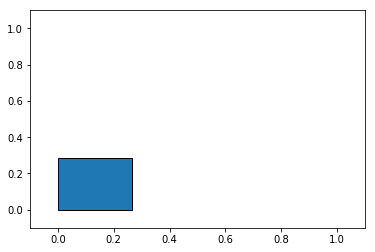

In [7]:
# plot a rectangle
def plot_rectangle(rect):
  # close the rectangle path
    rect.append(rect[0])
  # define path
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path = Path(rect, codes)
    axis = pyplot.gca()
    patch = PathPatch(path)
    axis.add_patch(patch)
    axis.set_xlim(-0.1,1.1)
    axis.set_ylim(-0.1,1.1)
    pyplot.show()
rect = random_rectangle()
plot_rectangle(rect)

In [8]:
from random import random
from numpy import array
from matplotlib import pyplot
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# generate input and output sequences for one random rectangle
def get_samples():
  # generate rectangle
    rect = random_rectangle()
    X, y = list(), list()
  # create input output pairs for each coordinate
    for i in range(1, len(rect)):
        X.append(rect[i-1])
        y.append(rect[i])
  # convert input sequence shape to have 1 time step and 2 features
    X, y = array(X), array(y)
    X = X.reshape((X.shape[0], 1, 2))
    return X, y

In [12]:
# use a fit LSTM model to generate a new rectangle from scratch
def generate_rectangle(model):
    rect = list()
    # use [0,0] to seed the generation process
    last = array([0.0,0.0]).reshape((1, 1, 2))
    rect.append([[y for y in x] for x in last[0]][0])
    # generate the remaining 3 coordinates
    for _ in range(3):
     # predict the next coordinate
        yhat = model.predict(last, verbose=0)
    # use this output as input for the next prediction
        last = yhat.reshape((1, 1, 2))
    # store coordinate
        rect.append([[y for y in x] for x in last[0]][0])
    return rect

In [14]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1, 2))) 
model.add(Dense(2, activation='linear'))
model.compile(loss='mae', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________


In [18]:

# fit model
for i in range(25000):
  X, y = get_samples()
  model.fit(X, y, epochs=1, verbose=2, shuffle=False)
# generate new shapes from scratch
rect = generate_rectangle(model)

Epoch 1/1
 - 0s - loss: 0.1634
Epoch 1/1
 - 0s - loss: 0.3162
Epoch 1/1
 - 0s - loss: 0.0937
Epoch 1/1
 - 0s - loss: 0.1069
Epoch 1/1
 - 0s - loss: 0.2075
Epoch 1/1
 - 0s - loss: 0.0401
Epoch 1/1
 - 0s - loss: 0.1050
Epoch 1/1
 - 0s - loss: 0.0350
Epoch 1/1
 - 0s - loss: 0.1287
Epoch 1/1
 - 0s - loss: 0.0312
Epoch 1/1
 - 0s - loss: 0.0572
Epoch 1/1
 - 0s - loss: 0.0513
Epoch 1/1
 - 0s - loss: 0.3806
Epoch 1/1
 - 0s - loss: 0.1001
Epoch 1/1
 - 0s - loss: 0.2016
Epoch 1/1
 - 0s - loss: 0.1028
Epoch 1/1
 - 0s - loss: 0.2282
Epoch 1/1
 - 0s - loss: 0.0840
Epoch 1/1
 - 0s - loss: 0.0483
Epoch 1/1
 - 0s - loss: 0.0367
Epoch 1/1
 - 0s - loss: 0.1335
Epoch 1/1
 - 0s - loss: 0.0989
Epoch 1/1
 - 0s - loss: 0.1318
Epoch 1/1
 - 0s - loss: 0.0373
Epoch 1/1
 - 0s - loss: 0.0806
Epoch 1/1
 - 0s - loss: 0.1221
Epoch 1/1
 - 0s - loss: 0.1890
Epoch 1/1
 - 0s - loss: 0.0993
Epoch 1/1
 - 0s - loss: 0.2027
Epoch 1/1
 - 0s - loss: 0.1083
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.1450
Epoch 1/

 - 0s - loss: 0.1149
Epoch 1/1
 - 0s - loss: 0.0288
Epoch 1/1
 - 0s - loss: 0.2021
Epoch 1/1
 - 0s - loss: 0.2938
Epoch 1/1
 - 0s - loss: 0.1582
Epoch 1/1
 - 0s - loss: 0.0943
Epoch 1/1
 - 0s - loss: 0.1014
Epoch 1/1
 - 0s - loss: 0.0728
Epoch 1/1
 - 0s - loss: 0.1639
Epoch 1/1
 - 0s - loss: 0.0725
Epoch 1/1
 - 0s - loss: 0.2060
Epoch 1/1
 - 0s - loss: 0.0675
Epoch 1/1
 - 0s - loss: 0.0731
Epoch 1/1
 - 0s - loss: 0.1249
Epoch 1/1
 - 0s - loss: 0.0461
Epoch 1/1
 - 0s - loss: 0.0677
Epoch 1/1
 - 0s - loss: 0.0975
Epoch 1/1
 - 0s - loss: 0.0594
Epoch 1/1
 - 0s - loss: 0.1617
Epoch 1/1
 - 0s - loss: 0.0947
Epoch 1/1
 - 0s - loss: 0.0796
Epoch 1/1
 - 0s - loss: 0.1254
Epoch 1/1
 - 0s - loss: 0.1160
Epoch 1/1
 - 0s - loss: 0.1540
Epoch 1/1
 - 0s - loss: 0.1137
Epoch 1/1
 - 0s - loss: 0.2845
Epoch 1/1
 - 0s - loss: 0.0558
Epoch 1/1
 - 0s - loss: 0.0627
Epoch 1/1
 - 0s - loss: 0.0785
Epoch 1/1
 - 0s - loss: 0.1623
Epoch 1/1
 - 0s - loss: 0.0922
Epoch 1/1
 - 0s - loss: 0.1621
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0779
Epoch 1/1
 - 0s - loss: 0.1013
Epoch 1/1
 - 0s - loss: 0.1309
Epoch 1/1
 - 0s - loss: 0.1706
Epoch 1/1
 - 0s - loss: 0.1139
Epoch 1/1
 - 0s - loss: 0.0151
Epoch 1/1
 - 0s - loss: 0.0560
Epoch 1/1
 - 0s - loss: 0.1293
Epoch 1/1
 - 0s - loss: 0.0940
Epoch 1/1
 - 0s - loss: 0.0472
Epoch 1/1
 - 0s - loss: 0.1634
Epoch 1/1
 - 0s - loss: 0.2013
Epoch 1/1
 - 0s - loss: 0.0899
Epoch 1/1
 - 0s - loss: 0.2216
Epoch 1/1
 - 0s - loss: 0.1443
Epoch 1/1
 - 0s - loss: 0.0223
Epoch 1/1
 - 0s - loss: 0.0714
Epoch 1/1
 - 0s - loss: 0.0801
Epoch 1/1
 - 0s - loss: 0.1799
Epoch 1/1
 - 0s - loss: 0.0463
Epoch 1/1
 - 0s - loss: 0.0288
Epoch 1/1
 - 0s - loss: 0.1398
Epoch 1/1
 - 0s - loss: 0.1103
Epoch 1/1
 - 0s - loss: 0.1280
Epoch 1/1
 - 0s - loss: 0.0683
Epoch 1/1
 - 0s - loss: 0.0911
Epoch 1/1
 - 0s - loss: 0.1331
Epoch 1/1
 - 0s - loss: 0.1290
Epoch 1/1
 - 0s - loss: 0.2446
Epoch 1/1
 - 0s - loss: 0.1116
Epoch 1/1
 - 0s - loss: 0.0623
Epoch 1/1
 - 0s - loss: 0.1760
Epoch 1/

 - 0s - loss: 0.0856
Epoch 1/1
 - 0s - loss: 0.1094
Epoch 1/1
 - 0s - loss: 0.1034
Epoch 1/1
 - 0s - loss: 0.0355
Epoch 1/1
 - 0s - loss: 0.1293
Epoch 1/1
 - 0s - loss: 0.0167
Epoch 1/1
 - 0s - loss: 0.0192
Epoch 1/1
 - 0s - loss: 0.0932
Epoch 1/1
 - 0s - loss: 0.0722
Epoch 1/1
 - 0s - loss: 0.0552
Epoch 1/1
 - 0s - loss: 0.1016
Epoch 1/1
 - 0s - loss: 0.1116
Epoch 1/1
 - 0s - loss: 0.0460
Epoch 1/1
 - 0s - loss: 0.0615
Epoch 1/1
 - 0s - loss: 0.0419
Epoch 1/1
 - 0s - loss: 0.0992
Epoch 1/1
 - 0s - loss: 0.0811
Epoch 1/1
 - 0s - loss: 0.0779
Epoch 1/1
 - 0s - loss: 0.0429
Epoch 1/1
 - 0s - loss: 0.1285
Epoch 1/1
 - 0s - loss: 0.0837
Epoch 1/1
 - 0s - loss: 0.0600
Epoch 1/1
 - 0s - loss: 0.1050
Epoch 1/1
 - 0s - loss: 0.0762
Epoch 1/1
 - 0s - loss: 0.1214
Epoch 1/1
 - 0s - loss: 0.0667
Epoch 1/1
 - 0s - loss: 0.0397
Epoch 1/1
 - 0s - loss: 0.1946
Epoch 1/1
 - 0s - loss: 0.2924
Epoch 1/1
 - 0s - loss: 0.0259
Epoch 1/1
 - 0s - loss: 0.0719
Epoch 1/1
 - 0s - loss: 0.1539
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0835
Epoch 1/1
 - 0s - loss: 0.1065
Epoch 1/1
 - 0s - loss: 0.1015
Epoch 1/1
 - 0s - loss: 0.1265
Epoch 1/1
 - 0s - loss: 0.0595
Epoch 1/1
 - 0s - loss: 0.1154
Epoch 1/1
 - 0s - loss: 0.2031
Epoch 1/1
 - 0s - loss: 0.1434
Epoch 1/1
 - 0s - loss: 0.0585
Epoch 1/1
 - 0s - loss: 0.1528
Epoch 1/1
 - 0s - loss: 0.0128
Epoch 1/1
 - 0s - loss: 0.0657
Epoch 1/1
 - 0s - loss: 0.0316
Epoch 1/1
 - 0s - loss: 0.2631
Epoch 1/1
 - 0s - loss: 0.1054
Epoch 1/1
 - 0s - loss: 0.1184
Epoch 1/1
 - 0s - loss: 0.0586
Epoch 1/1
 - 0s - loss: 0.1131
Epoch 1/1
 - 0s - loss: 0.0836
Epoch 1/1
 - 0s - loss: 0.1081
Epoch 1/1
 - 0s - loss: 0.1314
Epoch 1/1
 - 0s - loss: 0.1338
Epoch 1/1
 - 0s - loss: 0.1012
Epoch 1/1
 - 0s - loss: 0.1563
Epoch 1/1
 - 0s - loss: 0.0550
Epoch 1/1
 - 0s - loss: 0.0705
Epoch 1/1
 - 0s - loss: 0.0640
Epoch 1/1
 - 0s - loss: 0.1269
Epoch 1/1
 - 0s - loss: 0.1370
Epoch 1/1
 - 0s - loss: 0.0343
Epoch 1/1
 - 0s - loss: 0.1337
Epoch 1/1
 - 0s - loss: 0.0726
Epoch 1/

Epoch 1/1
 - 0s - loss: 0.2115
Epoch 1/1
 - 0s - loss: 0.0472
Epoch 1/1
 - 0s - loss: 0.1110
Epoch 1/1
 - 0s - loss: 0.0372
Epoch 1/1
 - 0s - loss: 0.1239
Epoch 1/1
 - 0s - loss: 0.1261
Epoch 1/1
 - 0s - loss: 0.0431
Epoch 1/1
 - 0s - loss: 0.0873
Epoch 1/1
 - 0s - loss: 0.1203
Epoch 1/1
 - 0s - loss: 0.1624
Epoch 1/1
 - 0s - loss: 0.0986
Epoch 1/1
 - 0s - loss: 0.1019
Epoch 1/1
 - 0s - loss: 0.1100
Epoch 1/1
 - 0s - loss: 0.1334
Epoch 1/1
 - 0s - loss: 0.0359
Epoch 1/1
 - 0s - loss: 0.1369
Epoch 1/1
 - 0s - loss: 0.1474
Epoch 1/1
 - 0s - loss: 0.1233
Epoch 1/1
 - 0s - loss: 0.0410
Epoch 1/1
 - 0s - loss: 0.0640
Epoch 1/1
 - 0s - loss: 0.0969
Epoch 1/1
 - 0s - loss: 0.0213
Epoch 1/1
 - 0s - loss: 0.0917
Epoch 1/1
 - 0s - loss: 0.3026
Epoch 1/1
 - 0s - loss: 0.0403
Epoch 1/1
 - 0s - loss: 0.0937
Epoch 1/1
 - 0s - loss: 0.2089
Epoch 1/1
 - 0s - loss: 0.0501
Epoch 1/1
 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.0762
Epoch 1/1
 - 0s - loss: 0.1048
Epoch 1/1
 - 0s - loss: 0.0766
Epoch 1/

 - 0s - loss: 0.1381
Epoch 1/1
 - 0s - loss: 0.1131
Epoch 1/1
 - 0s - loss: 0.0671
Epoch 1/1
 - 0s - loss: 0.0978
Epoch 1/1
 - 0s - loss: 0.0531
Epoch 1/1
 - 0s - loss: 0.1843
Epoch 1/1
 - 0s - loss: 0.0718
Epoch 1/1
 - 0s - loss: 0.0833
Epoch 1/1
 - 0s - loss: 0.1173
Epoch 1/1
 - 0s - loss: 0.0503
Epoch 1/1
 - 0s - loss: 0.2396
Epoch 1/1
 - 0s - loss: 0.1143
Epoch 1/1
 - 0s - loss: 0.1159
Epoch 1/1
 - 0s - loss: 0.1186
Epoch 1/1
 - 0s - loss: 0.0303
Epoch 1/1
 - 0s - loss: 0.0935
Epoch 1/1
 - 0s - loss: 0.0659
Epoch 1/1
 - 0s - loss: 0.0585
Epoch 1/1
 - 0s - loss: 0.0839
Epoch 1/1
 - 0s - loss: 0.0753
Epoch 1/1
 - 0s - loss: 0.0645
Epoch 1/1
 - 0s - loss: 0.1056
Epoch 1/1
 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.0901
Epoch 1/1
 - 0s - loss: 0.0817
Epoch 1/1
 - 0s - loss: 0.1699
Epoch 1/1
 - 0s - loss: 0.0690
Epoch 1/1
 - 0s - loss: 0.0643
Epoch 1/1
 - 0s - loss: 0.0625
Epoch 1/1
 - 0s - loss: 0.0850
Epoch 1/1
 - 0s - loss: 0.3101
Epoch 1/1
 - 0s - loss: 0.1779
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0807
Epoch 1/1
 - 0s - loss: 0.0777
Epoch 1/1
 - 0s - loss: 0.0476
Epoch 1/1
 - 0s - loss: 0.0786
Epoch 1/1
 - 0s - loss: 0.0578
Epoch 1/1
 - 0s - loss: 0.1171
Epoch 1/1
 - 0s - loss: 0.0863
Epoch 1/1
 - 0s - loss: 0.0460
Epoch 1/1
 - 0s - loss: 0.0555
Epoch 1/1
 - 0s - loss: 0.0844
Epoch 1/1
 - 0s - loss: 0.1214
Epoch 1/1
 - 0s - loss: 0.0731
Epoch 1/1
 - 0s - loss: 0.0509
Epoch 1/1
 - 0s - loss: 0.0823
Epoch 1/1
 - 0s - loss: 0.1533
Epoch 1/1
 - 0s - loss: 0.0753
Epoch 1/1
 - 0s - loss: 0.0586
Epoch 1/1
 - 0s - loss: 0.1555
Epoch 1/1
 - 0s - loss: 0.1251
Epoch 1/1
 - 0s - loss: 0.0209
Epoch 1/1
 - 0s - loss: 0.1251
Epoch 1/1
 - 0s - loss: 0.0887
Epoch 1/1
 - 0s - loss: 0.1275
Epoch 1/1
 - 0s - loss: 0.0692
Epoch 1/1
 - 0s - loss: 0.1640
Epoch 1/1
 - 0s - loss: 0.1063
Epoch 1/1
 - 0s - loss: 0.0329
Epoch 1/1
 - 0s - loss: 0.0679
Epoch 1/1
 - 0s - loss: 0.0808
Epoch 1/1
 - 0s - loss: 0.1758
Epoch 1/1
 - 0s - loss: 0.1970
Epoch 1/1
 - 0s - loss: 0.0328
Epoch 1/

 - 0s - loss: 0.2433
Epoch 1/1
 - 0s - loss: 0.1489
Epoch 1/1
 - 0s - loss: 0.1034
Epoch 1/1
 - 0s - loss: 0.0852
Epoch 1/1
 - 0s - loss: 0.0738
Epoch 1/1
 - 0s - loss: 0.0776
Epoch 1/1
 - 0s - loss: 0.1153
Epoch 1/1
 - 0s - loss: 0.0510
Epoch 1/1
 - 0s - loss: 0.0923
Epoch 1/1
 - 0s - loss: 0.0734
Epoch 1/1
 - 0s - loss: 0.1001
Epoch 1/1
 - 0s - loss: 0.0855
Epoch 1/1
 - 0s - loss: 0.1028
Epoch 1/1
 - 0s - loss: 0.0878
Epoch 1/1
 - 0s - loss: 0.1023
Epoch 1/1
 - 0s - loss: 0.1549
Epoch 1/1
 - 0s - loss: 0.2046
Epoch 1/1
 - 0s - loss: 0.0537
Epoch 1/1
 - 0s - loss: 0.0935
Epoch 1/1
 - 0s - loss: 0.0929
Epoch 1/1
 - 0s - loss: 0.2977
Epoch 1/1
 - 0s - loss: 0.1471
Epoch 1/1
 - 0s - loss: 0.0704
Epoch 1/1
 - 0s - loss: 0.0378
Epoch 1/1
 - 0s - loss: 0.0604
Epoch 1/1
 - 0s - loss: 0.1216
Epoch 1/1
 - 0s - loss: 0.1405
Epoch 1/1
 - 0s - loss: 0.0669
Epoch 1/1
 - 0s - loss: 0.0697
Epoch 1/1
 - 0s - loss: 0.0730
Epoch 1/1
 - 0s - loss: 0.0859
Epoch 1/1
 - 0s - loss: 0.0758
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0408
Epoch 1/1
 - 0s - loss: 0.0778
Epoch 1/1
 - 0s - loss: 0.0612
Epoch 1/1
 - 0s - loss: 0.1742
Epoch 1/1
 - 0s - loss: 0.1078
Epoch 1/1
 - 0s - loss: 0.1643
Epoch 1/1
 - 0s - loss: 0.1259
Epoch 1/1
 - 0s - loss: 0.0379
Epoch 1/1
 - 0s - loss: 0.0598
Epoch 1/1
 - 0s - loss: 0.0935
Epoch 1/1
 - 0s - loss: 0.1733
Epoch 1/1
 - 0s - loss: 0.1241
Epoch 1/1
 - 0s - loss: 0.2013
Epoch 1/1
 - 0s - loss: 0.0334
Epoch 1/1
 - 0s - loss: 0.1241
Epoch 1/1
 - 0s - loss: 0.1024
Epoch 1/1
 - 0s - loss: 0.0558
Epoch 1/1
 - 0s - loss: 0.1265
Epoch 1/1
 - 0s - loss: 0.0968
Epoch 1/1
 - 0s - loss: 0.0403
Epoch 1/1
 - 0s - loss: 0.0556
Epoch 1/1
 - 0s - loss: 0.1300
Epoch 1/1
 - 0s - loss: 0.0665
Epoch 1/1
 - 0s - loss: 0.0858
Epoch 1/1
 - 0s - loss: 0.0923
Epoch 1/1
 - 0s - loss: 0.1159
Epoch 1/1
 - 0s - loss: 0.1042
Epoch 1/1
 - 0s - loss: 0.0936
Epoch 1/1
 - 0s - loss: 0.0857
Epoch 1/1
 - 0s - loss: 0.0436
Epoch 1/1
 - 0s - loss: 0.1355
Epoch 1/1
 - 0s - loss: 0.0802
Epoch 1/

 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.0542
Epoch 1/1
 - 0s - loss: 0.0594
Epoch 1/1
 - 0s - loss: 0.0750
Epoch 1/1
 - 0s - loss: 0.0380
Epoch 1/1
 - 0s - loss: 0.0319
Epoch 1/1
 - 0s - loss: 0.1749
Epoch 1/1
 - 0s - loss: 0.0720
Epoch 1/1
 - 0s - loss: 0.1400
Epoch 1/1
 - 0s - loss: 0.0504
Epoch 1/1
 - 0s - loss: 0.2025
Epoch 1/1
 - 0s - loss: 0.0221
Epoch 1/1
 - 0s - loss: 0.1086
Epoch 1/1
 - 0s - loss: 0.0378
Epoch 1/1
 - 0s - loss: 0.0225
Epoch 1/1
 - 0s - loss: 0.1384
Epoch 1/1
 - 0s - loss: 0.0322
Epoch 1/1
 - 0s - loss: 0.0338
Epoch 1/1
 - 0s - loss: 0.1259
Epoch 1/1
 - 0s - loss: 0.1573
Epoch 1/1
 - 0s - loss: 0.0566
Epoch 1/1
 - 0s - loss: 0.1290
Epoch 1/1
 - 0s - loss: 0.0941
Epoch 1/1
 - 0s - loss: 0.0577
Epoch 1/1
 - 0s - loss: 0.0928
Epoch 1/1
 - 0s - loss: 0.1149
Epoch 1/1
 - 0s - loss: 0.0647
Epoch 1/1
 - 0s - loss: 0.1547
Epoch 1/1
 - 0s - loss: 0.1369
Epoch 1/1
 - 0s - loss: 0.1278
Epoch 1/1
 - 0s - loss: 0.1440
Epoch 1/1
 - 0s - loss: 0.2083
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1300
Epoch 1/1
 - 0s - loss: 0.0579
Epoch 1/1
 - 0s - loss: 0.0856
Epoch 1/1
 - 0s - loss: 0.1163
Epoch 1/1
 - 0s - loss: 0.1120
Epoch 1/1
 - 0s - loss: 0.0086
Epoch 1/1
 - 0s - loss: 0.0668
Epoch 1/1
 - 0s - loss: 0.0221
Epoch 1/1
 - 0s - loss: 0.2298
Epoch 1/1
 - 0s - loss: 0.0777
Epoch 1/1
 - 0s - loss: 0.1032
Epoch 1/1
 - 0s - loss: 0.0951
Epoch 1/1
 - 0s - loss: 0.0957
Epoch 1/1
 - 0s - loss: 0.0988
Epoch 1/1
 - 0s - loss: 0.3444
Epoch 1/1
 - 0s - loss: 0.1401
Epoch 1/1
 - 0s - loss: 0.0558
Epoch 1/1
 - 0s - loss: 0.0695
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.0745
Epoch 1/1
 - 0s - loss: 0.2776
Epoch 1/1
 - 0s - loss: 0.0719
Epoch 1/1
 - 0s - loss: 0.1050
Epoch 1/1
 - 0s - loss: 0.0983
Epoch 1/1
 - 0s - loss: 0.0940
Epoch 1/1
 - 0s - loss: 0.0837
Epoch 1/1
 - 0s - loss: 0.1397
Epoch 1/1
 - 0s - loss: 0.0814
Epoch 1/1
 - 0s - loss: 0.0748
Epoch 1/1
 - 0s - loss: 0.1631
Epoch 1/1
 - 0s - loss: 0.0859
Epoch 1/1
 - 0s - loss: 0.1536
Epoch 1/

 - 0s - loss: 0.1315
Epoch 1/1
 - 0s - loss: 0.1521
Epoch 1/1
 - 0s - loss: 0.0499
Epoch 1/1
 - 0s - loss: 0.1095
Epoch 1/1
 - 0s - loss: 0.0916
Epoch 1/1
 - 0s - loss: 0.0597
Epoch 1/1
 - 0s - loss: 0.1145
Epoch 1/1
 - 0s - loss: 0.1282
Epoch 1/1
 - 0s - loss: 0.2763
Epoch 1/1
 - 0s - loss: 0.1252
Epoch 1/1
 - 0s - loss: 0.2128
Epoch 1/1
 - 0s - loss: 0.0603
Epoch 1/1
 - 0s - loss: 0.1025
Epoch 1/1
 - 0s - loss: 0.1484
Epoch 1/1
 - 0s - loss: 0.0317
Epoch 1/1
 - 0s - loss: 0.0789
Epoch 1/1
 - 0s - loss: 0.0545
Epoch 1/1
 - 0s - loss: 0.0578
Epoch 1/1
 - 0s - loss: 0.0911
Epoch 1/1
 - 0s - loss: 0.0839
Epoch 1/1
 - 0s - loss: 0.1479
Epoch 1/1
 - 0s - loss: 0.0823
Epoch 1/1
 - 0s - loss: 0.0944
Epoch 1/1
 - 0s - loss: 0.1992
Epoch 1/1
 - 0s - loss: 0.0963
Epoch 1/1
 - 0s - loss: 0.0399
Epoch 1/1
 - 0s - loss: 0.0660
Epoch 1/1
 - 0s - loss: 0.0932
Epoch 1/1
 - 0s - loss: 0.0649
Epoch 1/1
 - 0s - loss: 0.1079
Epoch 1/1
 - 0s - loss: 0.1074
Epoch 1/1
 - 0s - loss: 0.0740
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0312
Epoch 1/1
 - 0s - loss: 0.1123
Epoch 1/1
 - 0s - loss: 0.1323
Epoch 1/1
 - 0s - loss: 0.0792
Epoch 1/1
 - 0s - loss: 0.2250
Epoch 1/1
 - 0s - loss: 0.1088
Epoch 1/1
 - 0s - loss: 0.1063
Epoch 1/1
 - 0s - loss: 0.0671
Epoch 1/1
 - 0s - loss: 0.1416
Epoch 1/1
 - 0s - loss: 0.0543
Epoch 1/1
 - 0s - loss: 0.0106
Epoch 1/1
 - 0s - loss: 0.3133
Epoch 1/1
 - 0s - loss: 0.2578
Epoch 1/1
 - 0s - loss: 0.0868
Epoch 1/1
 - 0s - loss: 0.0470
Epoch 1/1
 - 0s - loss: 0.0607
Epoch 1/1
 - 0s - loss: 0.1920
Epoch 1/1
 - 0s - loss: 0.0729
Epoch 1/1
 - 0s - loss: 0.1494
Epoch 1/1
 - 0s - loss: 0.0909
Epoch 1/1
 - 0s - loss: 0.0684
Epoch 1/1
 - 0s - loss: 0.1439
Epoch 1/1
 - 0s - loss: 0.1643
Epoch 1/1
 - 0s - loss: 0.0789
Epoch 1/1
 - 0s - loss: 0.1135
Epoch 1/1
 - 0s - loss: 0.1001
Epoch 1/1
 - 0s - loss: 0.1350
Epoch 1/1
 - 0s - loss: 0.1553
Epoch 1/1
 - 0s - loss: 0.1925
Epoch 1/1
 - 0s - loss: 0.2820
Epoch 1/1
 - 0s - loss: 0.1220
Epoch 1/1
 - 0s - loss: 0.0586
Epoch 1/

 - 0s - loss: 0.1181
Epoch 1/1
 - 0s - loss: 0.3696
Epoch 1/1
 - 0s - loss: 0.1765
Epoch 1/1
 - 0s - loss: 0.0844
Epoch 1/1
 - 0s - loss: 0.0737
Epoch 1/1
 - 0s - loss: 0.0939
Epoch 1/1
 - 0s - loss: 0.1185
Epoch 1/1
 - 0s - loss: 0.1423
Epoch 1/1
 - 0s - loss: 0.2332
Epoch 1/1
 - 0s - loss: 0.1414
Epoch 1/1
 - 0s - loss: 0.0977
Epoch 1/1
 - 0s - loss: 0.0609
Epoch 1/1
 - 0s - loss: 0.0580
Epoch 1/1
 - 0s - loss: 0.0931
Epoch 1/1
 - 0s - loss: 0.1780
Epoch 1/1
 - 0s - loss: 0.1053
Epoch 1/1
 - 0s - loss: 0.1088
Epoch 1/1
 - 0s - loss: 0.0844
Epoch 1/1
 - 0s - loss: 0.1126
Epoch 1/1
 - 0s - loss: 0.2070
Epoch 1/1
 - 0s - loss: 0.1436
Epoch 1/1
 - 0s - loss: 0.1163
Epoch 1/1
 - 0s - loss: 0.0719
Epoch 1/1
 - 0s - loss: 0.1004
Epoch 1/1
 - 0s - loss: 0.0623
Epoch 1/1
 - 0s - loss: 0.1264
Epoch 1/1
 - 0s - loss: 0.2084
Epoch 1/1
 - 0s - loss: 0.1847
Epoch 1/1
 - 0s - loss: 0.1327
Epoch 1/1
 - 0s - loss: 0.0730
Epoch 1/1
 - 0s - loss: 0.0242
Epoch 1/1
 - 0s - loss: 0.1133
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1719
Epoch 1/1
 - 0s - loss: 0.2048
Epoch 1/1
 - 0s - loss: 0.1796
Epoch 1/1
 - 0s - loss: 0.1661
Epoch 1/1
 - 0s - loss: 0.1019
Epoch 1/1
 - 0s - loss: 0.0700
Epoch 1/1
 - 0s - loss: 0.2442
Epoch 1/1
 - 0s - loss: 0.1795
Epoch 1/1
 - 0s - loss: 0.1431
Epoch 1/1
 - 0s - loss: 0.0502
Epoch 1/1
 - 0s - loss: 0.0684
Epoch 1/1
 - 0s - loss: 0.0956
Epoch 1/1
 - 0s - loss: 0.0456
Epoch 1/1
 - 0s - loss: 0.0571
Epoch 1/1
 - 0s - loss: 0.0255
Epoch 1/1
 - 0s - loss: 0.1366
Epoch 1/1
 - 0s - loss: 0.0775
Epoch 1/1
 - 0s - loss: 0.1016
Epoch 1/1
 - 0s - loss: 0.0640
Epoch 1/1
 - 0s - loss: 0.3106
Epoch 1/1
 - 0s - loss: 0.0515
Epoch 1/1
 - 0s - loss: 0.0747
Epoch 1/1
 - 0s - loss: 0.0651
Epoch 1/1
 - 0s - loss: 0.0667
Epoch 1/1
 - 0s - loss: 0.0819
Epoch 1/1
 - 0s - loss: 0.1051
Epoch 1/1
 - 0s - loss: 0.0486
Epoch 1/1
 - 0s - loss: 0.1388
Epoch 1/1
 - 0s - loss: 0.0917
Epoch 1/1
 - 0s - loss: 0.1618
Epoch 1/1
 - 0s - loss: 0.0647
Epoch 1/1
 - 0s - loss: 0.1051
Epoch 1/

 - 0s - loss: 0.1184
Epoch 1/1
 - 0s - loss: 0.0954
Epoch 1/1
 - 0s - loss: 0.0894
Epoch 1/1
 - 0s - loss: 0.1399
Epoch 1/1
 - 0s - loss: 0.0593
Epoch 1/1
 - 0s - loss: 0.0617
Epoch 1/1
 - 0s - loss: 0.0365
Epoch 1/1
 - 0s - loss: 0.1228
Epoch 1/1
 - 0s - loss: 0.0334
Epoch 1/1
 - 0s - loss: 0.1149
Epoch 1/1
 - 0s - loss: 0.1118
Epoch 1/1
 - 0s - loss: 0.1494
Epoch 1/1
 - 0s - loss: 0.0657
Epoch 1/1
 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.0826
Epoch 1/1
 - 0s - loss: 0.1031
Epoch 1/1
 - 0s - loss: 0.0731
Epoch 1/1
 - 0s - loss: 0.0546
Epoch 1/1
 - 0s - loss: 0.0636
Epoch 1/1
 - 0s - loss: 0.0713
Epoch 1/1
 - 0s - loss: 0.1407
Epoch 1/1
 - 0s - loss: 0.1088
Epoch 1/1
 - 0s - loss: 0.2287
Epoch 1/1
 - 0s - loss: 0.0449
Epoch 1/1
 - 0s - loss: 0.0183
Epoch 1/1
 - 0s - loss: 0.1446
Epoch 1/1
 - 0s - loss: 0.0449
Epoch 1/1
 - 0s - loss: 0.2311
Epoch 1/1
 - 0s - loss: 0.1010
Epoch 1/1
 - 0s - loss: 0.1790
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0636
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0668
Epoch 1/1
 - 0s - loss: 0.1003
Epoch 1/1
 - 0s - loss: 0.0657
Epoch 1/1
 - 0s - loss: 0.1692
Epoch 1/1
 - 0s - loss: 0.0956
Epoch 1/1
 - 0s - loss: 0.0959
Epoch 1/1
 - 0s - loss: 0.2696
Epoch 1/1
 - 0s - loss: 0.0784
Epoch 1/1
 - 0s - loss: 0.0093
Epoch 1/1
 - 0s - loss: 0.1172
Epoch 1/1
 - 0s - loss: 0.1504
Epoch 1/1
 - 0s - loss: 0.3608
Epoch 1/1
 - 0s - loss: 0.1045
Epoch 1/1
 - 0s - loss: 0.1165
Epoch 1/1
 - 0s - loss: 0.1503
Epoch 1/1
 - 0s - loss: 0.1628
Epoch 1/1
 - 0s - loss: 0.0996
Epoch 1/1
 - 0s - loss: 0.2290
Epoch 1/1
 - 0s - loss: 0.0666
Epoch 1/1
 - 0s - loss: 0.1539
Epoch 1/1
 - 0s - loss: 0.0973
Epoch 1/1
 - 0s - loss: 0.1294
Epoch 1/1
 - 0s - loss: 0.1121
Epoch 1/1
 - 0s - loss: 0.0375
Epoch 1/1
 - 0s - loss: 0.2004
Epoch 1/1
 - 0s - loss: 0.0624
Epoch 1/1
 - 0s - loss: 0.1469
Epoch 1/1
 - 0s - loss: 0.0868
Epoch 1/1
 - 0s - loss: 0.1322
Epoch 1/1
 - 0s - loss: 0.2103
Epoch 1/1
 - 0s - loss: 0.1024
Epoch 1/1
 - 0s - loss: 0.1405
Epoch 1/

 - 0s - loss: 0.0612
Epoch 1/1
 - 0s - loss: 0.0661
Epoch 1/1
 - 0s - loss: 0.0346
Epoch 1/1
 - 0s - loss: 0.1221
Epoch 1/1
 - 0s - loss: 0.0861
Epoch 1/1
 - 0s - loss: 0.0768
Epoch 1/1
 - 0s - loss: 0.2226
Epoch 1/1
 - 0s - loss: 0.0878
Epoch 1/1
 - 0s - loss: 0.0643
Epoch 1/1
 - 0s - loss: 0.1016
Epoch 1/1
 - 0s - loss: 0.0987
Epoch 1/1
 - 0s - loss: 0.0921
Epoch 1/1
 - 0s - loss: 0.0218
Epoch 1/1
 - 0s - loss: 0.2364
Epoch 1/1
 - 0s - loss: 0.0958
Epoch 1/1
 - 0s - loss: 0.1312
Epoch 1/1
 - 0s - loss: 0.1114
Epoch 1/1
 - 0s - loss: 0.0170
Epoch 1/1
 - 0s - loss: 0.0834
Epoch 1/1
 - 0s - loss: 0.1054
Epoch 1/1
 - 0s - loss: 0.0896
Epoch 1/1
 - 0s - loss: 0.0667
Epoch 1/1
 - 0s - loss: 0.0909
Epoch 1/1
 - 0s - loss: 0.0958
Epoch 1/1
 - 0s - loss: 0.0561
Epoch 1/1
 - 0s - loss: 0.0395
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0625
Epoch 1/1
 - 0s - loss: 0.1206
Epoch 1/1
 - 0s - loss: 0.0537
Epoch 1/1
 - 0s - loss: 0.0657
Epoch 1/1
 - 0s - loss: 0.0633
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0656
Epoch 1/1
 - 0s - loss: 0.0222
Epoch 1/1
 - 0s - loss: 0.1084
Epoch 1/1
 - 0s - loss: 0.0765
Epoch 1/1
 - 0s - loss: 0.0257
Epoch 1/1
 - 0s - loss: 0.1571
Epoch 1/1
 - 0s - loss: 0.1072
Epoch 1/1
 - 0s - loss: 0.0828
Epoch 1/1
 - 0s - loss: 0.0390
Epoch 1/1
 - 0s - loss: 0.0594
Epoch 1/1
 - 0s - loss: 0.0955
Epoch 1/1
 - 0s - loss: 0.1012
Epoch 1/1
 - 0s - loss: 0.0748
Epoch 1/1
 - 0s - loss: 0.1825
Epoch 1/1
 - 0s - loss: 0.0933
Epoch 1/1
 - 0s - loss: 0.1546
Epoch 1/1
 - 0s - loss: 0.0846
Epoch 1/1
 - 0s - loss: 0.1491
Epoch 1/1
 - 0s - loss: 0.0901
Epoch 1/1
 - 0s - loss: 0.0113
Epoch 1/1
 - 0s - loss: 0.2044
Epoch 1/1
 - 0s - loss: 0.0979
Epoch 1/1
 - 0s - loss: 0.1482
Epoch 1/1
 - 0s - loss: 0.1648
Epoch 1/1
 - 0s - loss: 0.0669
Epoch 1/1
 - 0s - loss: 0.3787
Epoch 1/1
 - 0s - loss: 0.0558
Epoch 1/1
 - 0s - loss: 0.1067
Epoch 1/1
 - 0s - loss: 0.2428
Epoch 1/1
 - 0s - loss: 0.0902
Epoch 1/1
 - 0s - loss: 0.2047
Epoch 1/1
 - 0s - loss: 0.0554
Epoch 1/

 - 0s - loss: 0.1997
Epoch 1/1
 - 0s - loss: 0.1505
Epoch 1/1
 - 0s - loss: 0.0866
Epoch 1/1
 - 0s - loss: 0.1167
Epoch 1/1
 - 0s - loss: 0.0221
Epoch 1/1
 - 0s - loss: 0.2418
Epoch 1/1
 - 0s - loss: 0.1429
Epoch 1/1
 - 0s - loss: 0.0836
Epoch 1/1
 - 0s - loss: 0.1084
Epoch 1/1
 - 0s - loss: 0.0894
Epoch 1/1
 - 0s - loss: 0.0499
Epoch 1/1
 - 0s - loss: 0.1272
Epoch 1/1
 - 0s - loss: 0.0651
Epoch 1/1
 - 0s - loss: 0.0742
Epoch 1/1
 - 0s - loss: 0.1008
Epoch 1/1
 - 0s - loss: 0.1127
Epoch 1/1
 - 0s - loss: 0.1516
Epoch 1/1
 - 0s - loss: 0.1031
Epoch 1/1
 - 0s - loss: 0.0957
Epoch 1/1
 - 0s - loss: 0.0795
Epoch 1/1
 - 0s - loss: 0.0942
Epoch 1/1
 - 0s - loss: 0.1078
Epoch 1/1
 - 0s - loss: 0.0835
Epoch 1/1
 - 0s - loss: 0.2895
Epoch 1/1
 - 0s - loss: 0.1148
Epoch 1/1
 - 0s - loss: 0.2447
Epoch 1/1
 - 0s - loss: 0.0752
Epoch 1/1
 - 0s - loss: 0.0801
Epoch 1/1
 - 0s - loss: 0.0580
Epoch 1/1
 - 0s - loss: 0.1105
Epoch 1/1
 - 0s - loss: 0.2086
Epoch 1/1
 - 0s - loss: 0.1351
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1050
Epoch 1/1
 - 0s - loss: 0.1702
Epoch 1/1
 - 0s - loss: 0.0968
Epoch 1/1
 - 0s - loss: 0.0401
Epoch 1/1
 - 0s - loss: 0.0575
Epoch 1/1
 - 0s - loss: 0.1234
Epoch 1/1
 - 0s - loss: 0.0220
Epoch 1/1
 - 0s - loss: 0.1094
Epoch 1/1
 - 0s - loss: 0.1003
Epoch 1/1
 - 0s - loss: 0.2510
Epoch 1/1
 - 0s - loss: 0.0801
Epoch 1/1
 - 0s - loss: 0.1184
Epoch 1/1
 - 0s - loss: 0.1256
Epoch 1/1
 - 0s - loss: 0.0627
Epoch 1/1
 - 0s - loss: 0.0534
Epoch 1/1
 - 0s - loss: 0.0169
Epoch 1/1
 - 0s - loss: 0.0830
Epoch 1/1
 - 0s - loss: 0.0830
Epoch 1/1
 - 0s - loss: 0.1298
Epoch 1/1
 - 0s - loss: 0.1124
Epoch 1/1
 - 0s - loss: 0.1216
Epoch 1/1
 - 0s - loss: 0.0484
Epoch 1/1
 - 0s - loss: 0.1269
Epoch 1/1
 - 0s - loss: 0.0863
Epoch 1/1
 - 0s - loss: 0.0806
Epoch 1/1
 - 0s - loss: 0.0791
Epoch 1/1
 - 0s - loss: 0.1218
Epoch 1/1
 - 0s - loss: 0.1003
Epoch 1/1
 - 0s - loss: 0.2235
Epoch 1/1
 - 0s - loss: 0.1073
Epoch 1/1
 - 0s - loss: 0.1951
Epoch 1/1
 - 0s - loss: 0.0691
Epoch 1/

 - 0s - loss: 0.1919
Epoch 1/1
 - 0s - loss: 0.1071
Epoch 1/1
 - 0s - loss: 0.0556
Epoch 1/1
 - 0s - loss: 0.1562
Epoch 1/1
 - 0s - loss: 0.0945
Epoch 1/1
 - 0s - loss: 0.0528
Epoch 1/1
 - 0s - loss: 0.0609
Epoch 1/1
 - 0s - loss: 0.0480
Epoch 1/1
 - 0s - loss: 0.0522
Epoch 1/1
 - 0s - loss: 0.1020
Epoch 1/1
 - 0s - loss: 0.1028
Epoch 1/1
 - 0s - loss: 0.1068
Epoch 1/1
 - 0s - loss: 0.0942
Epoch 1/1
 - 0s - loss: 0.1031
Epoch 1/1
 - 0s - loss: 0.1278
Epoch 1/1
 - 0s - loss: 0.1228
Epoch 1/1
 - 0s - loss: 0.1228
Epoch 1/1
 - 0s - loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.1110
Epoch 1/1
 - 0s - loss: 0.1357
Epoch 1/1
 - 0s - loss: 0.1131
Epoch 1/1
 - 0s - loss: 0.0948
Epoch 1/1
 - 0s - loss: 0.0593
Epoch 1/1
 - 0s - loss: 0.1114
Epoch 1/1
 - 0s - loss: 0.1273
Epoch 1/1
 - 0s - loss: 0.0588
Epoch 1/1
 - 0s - loss: 0.0742
Epoch 1/1
 - 0s - loss: 0.1680
Epoch 1/1
 - 0s - loss: 0.1011
Epoch 1/1
 - 0s - loss: 0.1132
Epoch 1/1
 - 0s - loss: 0.1589
Epoch 1/1
 - 0s - loss: 0.0441
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0648
Epoch 1/1
 - 0s - loss: 0.0708
Epoch 1/1
 - 0s - loss: 0.1114
Epoch 1/1
 - 0s - loss: 0.1453
Epoch 1/1
 - 0s - loss: 0.0693
Epoch 1/1
 - 0s - loss: 0.0148
Epoch 1/1
 - 0s - loss: 0.1000
Epoch 1/1
 - 0s - loss: 0.0537
Epoch 1/1
 - 0s - loss: 0.0985
Epoch 1/1
 - 0s - loss: 0.1631
Epoch 1/1
 - 0s - loss: 0.0832
Epoch 1/1
 - 0s - loss: 0.0831
Epoch 1/1
 - 0s - loss: 0.0946
Epoch 1/1
 - 0s - loss: 0.0634
Epoch 1/1
 - 0s - loss: 0.0195
Epoch 1/1
 - 0s - loss: 0.1168
Epoch 1/1
 - 0s - loss: 0.0914
Epoch 1/1
 - 0s - loss: 0.1346
Epoch 1/1
 - 0s - loss: 0.0615
Epoch 1/1
 - 0s - loss: 0.0681
Epoch 1/1
 - 0s - loss: 0.0705
Epoch 1/1
 - 0s - loss: 0.0394
Epoch 1/1
 - 0s - loss: 0.1581
Epoch 1/1
 - 0s - loss: 0.0799
Epoch 1/1
 - 0s - loss: 0.0762
Epoch 1/1
 - 0s - loss: 0.1117
Epoch 1/1
 - 0s - loss: 0.1256
Epoch 1/1
 - 0s - loss: 0.1561
Epoch 1/1
 - 0s - loss: 0.0856
Epoch 1/1
 - 0s - loss: 0.0574
Epoch 1/1
 - 0s - loss: 0.0148
Epoch 1/1
 - 0s - loss: 0.0506
Epoch 1/

 - 0s - loss: 0.0753
Epoch 1/1
 - 0s - loss: 0.2133
Epoch 1/1
 - 0s - loss: 0.1395
Epoch 1/1
 - 0s - loss: 0.0996
Epoch 1/1
 - 0s - loss: 0.1839
Epoch 1/1
 - 0s - loss: 0.1164
Epoch 1/1
 - 0s - loss: 0.1097
Epoch 1/1
 - 0s - loss: 0.1394
Epoch 1/1
 - 0s - loss: 0.0515
Epoch 1/1
 - 0s - loss: 0.1222
Epoch 1/1
 - 0s - loss: 0.0969
Epoch 1/1
 - 0s - loss: 0.1740
Epoch 1/1
 - 0s - loss: 0.1150
Epoch 1/1
 - 0s - loss: 0.1134
Epoch 1/1
 - 0s - loss: 0.0797
Epoch 1/1
 - 0s - loss: 0.1150
Epoch 1/1
 - 0s - loss: 0.1462
Epoch 1/1
 - 0s - loss: 0.1500
Epoch 1/1
 - 0s - loss: 0.1077
Epoch 1/1
 - 0s - loss: 0.0539
Epoch 1/1
 - 0s - loss: 0.0627
Epoch 1/1
 - 0s - loss: 0.0614
Epoch 1/1
 - 0s - loss: 0.1162
Epoch 1/1
 - 0s - loss: 0.0486
Epoch 1/1
 - 0s - loss: 0.1062
Epoch 1/1
 - 0s - loss: 0.0975
Epoch 1/1
 - 0s - loss: 0.0880
Epoch 1/1
 - 0s - loss: 0.1013
Epoch 1/1
 - 0s - loss: 0.1914
Epoch 1/1
 - 0s - loss: 0.0140
Epoch 1/1
 - 0s - loss: 0.0707
Epoch 1/1
 - 0s - loss: 0.0845
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1206
Epoch 1/1
 - 0s - loss: 0.4119
Epoch 1/1
 - 0s - loss: 0.0988
Epoch 1/1
 - 0s - loss: 0.0479
Epoch 1/1
 - 0s - loss: 0.0420
Epoch 1/1
 - 0s - loss: 0.1605
Epoch 1/1
 - 0s - loss: 0.0340
Epoch 1/1
 - 0s - loss: 0.1550
Epoch 1/1
 - 0s - loss: 0.2222
Epoch 1/1
 - 0s - loss: 0.1235
Epoch 1/1
 - 0s - loss: 0.0930
Epoch 1/1
 - 0s - loss: 0.0725
Epoch 1/1
 - 0s - loss: 0.0823
Epoch 1/1
 - 0s - loss: 0.0726
Epoch 1/1
 - 0s - loss: 0.2182
Epoch 1/1
 - 0s - loss: 0.0602
Epoch 1/1
 - 0s - loss: 0.0896
Epoch 1/1
 - 0s - loss: 0.2900
Epoch 1/1
 - 0s - loss: 0.2206
Epoch 1/1
 - 0s - loss: 0.0454
Epoch 1/1
 - 0s - loss: 0.1474
Epoch 1/1
 - 0s - loss: 0.1448
Epoch 1/1
 - 0s - loss: 0.1176
Epoch 1/1
 - 0s - loss: 0.1743
Epoch 1/1
 - 0s - loss: 0.0946
Epoch 1/1
 - 0s - loss: 0.0677
Epoch 1/1
 - 0s - loss: 0.0977
Epoch 1/1
 - 0s - loss: 0.1009
Epoch 1/1
 - 0s - loss: 0.1068
Epoch 1/1
 - 0s - loss: 0.0559
Epoch 1/1
 - 0s - loss: 0.0678
Epoch 1/1
 - 0s - loss: 0.1332
Epoch 1/

 - 0s - loss: 0.0678
Epoch 1/1
 - 0s - loss: 0.1563
Epoch 1/1
 - 0s - loss: 0.1484
Epoch 1/1
 - 0s - loss: 0.0499
Epoch 1/1
 - 0s - loss: 0.1954
Epoch 1/1
 - 0s - loss: 0.0359
Epoch 1/1
 - 0s - loss: 0.1221
Epoch 1/1
 - 0s - loss: 0.1953
Epoch 1/1
 - 0s - loss: 0.0671
Epoch 1/1
 - 0s - loss: 0.0624
Epoch 1/1
 - 0s - loss: 0.1591
Epoch 1/1
 - 0s - loss: 0.2473
Epoch 1/1
 - 0s - loss: 0.2712
Epoch 1/1
 - 0s - loss: 0.0955
Epoch 1/1
 - 0s - loss: 0.1600
Epoch 1/1
 - 0s - loss: 0.0328
Epoch 1/1
 - 0s - loss: 0.2118
Epoch 1/1
 - 0s - loss: 0.0696
Epoch 1/1
 - 0s - loss: 0.0262
Epoch 1/1
 - 0s - loss: 0.0544
Epoch 1/1
 - 0s - loss: 0.1719
Epoch 1/1
 - 0s - loss: 0.0564
Epoch 1/1
 - 0s - loss: 0.1277
Epoch 1/1
 - 0s - loss: 0.0459
Epoch 1/1
 - 0s - loss: 0.1170
Epoch 1/1
 - 0s - loss: 0.1578
Epoch 1/1
 - 0s - loss: 0.1410
Epoch 1/1
 - 0s - loss: 0.1585
Epoch 1/1
 - 0s - loss: 0.0488
Epoch 1/1
 - 0s - loss: 0.0894
Epoch 1/1
 - 0s - loss: 0.1247
Epoch 1/1
 - 0s - loss: 0.1759
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1084
Epoch 1/1
 - 0s - loss: 0.0658
Epoch 1/1
 - 0s - loss: 0.1024
Epoch 1/1
 - 0s - loss: 0.1328
Epoch 1/1
 - 0s - loss: 0.0342
Epoch 1/1
 - 0s - loss: 0.1001
Epoch 1/1
 - 0s - loss: 0.1688
Epoch 1/1
 - 0s - loss: 0.0851
Epoch 1/1
 - 0s - loss: 0.0135
Epoch 1/1
 - 0s - loss: 0.0390
Epoch 1/1
 - 0s - loss: 0.0909
Epoch 1/1
 - 0s - loss: 0.0578
Epoch 1/1
 - 0s - loss: 0.1052
Epoch 1/1
 - 0s - loss: 0.0959
Epoch 1/1
 - 0s - loss: 0.0562
Epoch 1/1
 - 0s - loss: 0.1662
Epoch 1/1
 - 0s - loss: 0.0347
Epoch 1/1
 - 0s - loss: 0.1710
Epoch 1/1
 - 0s - loss: 0.0327
Epoch 1/1
 - 0s - loss: 0.0584
Epoch 1/1
 - 0s - loss: 0.1415
Epoch 1/1
 - 0s - loss: 0.1014
Epoch 1/1
 - 0s - loss: 0.0818
Epoch 1/1
 - 0s - loss: 0.1042
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.1450
Epoch 1/1
 - 0s - loss: 0.1315
Epoch 1/1
 - 0s - loss: 0.0633
Epoch 1/1
 - 0s - loss: 0.0294
Epoch 1/1
 - 0s - loss: 0.1156
Epoch 1/1
 - 0s - loss: 0.0819
Epoch 1/1
 - 0s - loss: 0.1506
Epoch 1/

 - 0s - loss: 0.0591
Epoch 1/1
 - 0s - loss: 0.1577
Epoch 1/1
 - 0s - loss: 0.0861
Epoch 1/1
 - 0s - loss: 0.0838
Epoch 1/1
 - 0s - loss: 0.1529
Epoch 1/1
 - 0s - loss: 0.0939
Epoch 1/1
 - 0s - loss: 0.0849
Epoch 1/1
 - 0s - loss: 0.0631
Epoch 1/1
 - 0s - loss: 0.0718
Epoch 1/1
 - 0s - loss: 0.1179
Epoch 1/1
 - 0s - loss: 0.0903
Epoch 1/1
 - 0s - loss: 0.1315
Epoch 1/1
 - 0s - loss: 0.0823
Epoch 1/1
 - 0s - loss: 0.0569
Epoch 1/1
 - 0s - loss: 0.1097
Epoch 1/1
 - 0s - loss: 0.1766
Epoch 1/1
 - 0s - loss: 0.2711
Epoch 1/1
 - 0s - loss: 0.0896
Epoch 1/1
 - 0s - loss: 0.0262
Epoch 1/1
 - 0s - loss: 0.0769
Epoch 1/1
 - 0s - loss: 0.0786
Epoch 1/1
 - 0s - loss: 0.1125
Epoch 1/1
 - 0s - loss: 0.0861
Epoch 1/1
 - 0s - loss: 0.2536
Epoch 1/1
 - 0s - loss: 0.1360
Epoch 1/1
 - 0s - loss: 0.1189
Epoch 1/1
 - 0s - loss: 0.1688
Epoch 1/1
 - 0s - loss: 0.0370
Epoch 1/1
 - 0s - loss: 0.1299
Epoch 1/1
 - 0s - loss: 0.1049
Epoch 1/1
 - 0s - loss: 0.1174
Epoch 1/1
 - 0s - loss: 0.0887
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0490
Epoch 1/1
 - 0s - loss: 0.1132
Epoch 1/1
 - 0s - loss: 0.0571
Epoch 1/1
 - 0s - loss: 0.0729
Epoch 1/1
 - 0s - loss: 0.1054
Epoch 1/1
 - 0s - loss: 0.0345
Epoch 1/1
 - 0s - loss: 0.1312
Epoch 1/1
 - 0s - loss: 0.1325
Epoch 1/1
 - 0s - loss: 0.1337
Epoch 1/1
 - 0s - loss: 0.0681
Epoch 1/1
 - 0s - loss: 0.1415
Epoch 1/1
 - 0s - loss: 0.0786
Epoch 1/1
 - 0s - loss: 0.0488
Epoch 1/1
 - 0s - loss: 0.0499
Epoch 1/1
 - 0s - loss: 0.0715
Epoch 1/1
 - 0s - loss: 0.0612
Epoch 1/1
 - 0s - loss: 0.1134
Epoch 1/1
 - 0s - loss: 0.0944
Epoch 1/1
 - 0s - loss: 0.1276
Epoch 1/1
 - 0s - loss: 0.1305
Epoch 1/1
 - 0s - loss: 0.1498
Epoch 1/1
 - 0s - loss: 0.0732
Epoch 1/1
 - 0s - loss: 0.0749
Epoch 1/1
 - 0s - loss: 0.0623
Epoch 1/1
 - 0s - loss: 0.0584
Epoch 1/1
 - 0s - loss: 0.1030
Epoch 1/1
 - 0s - loss: 0.2520
Epoch 1/1
 - 0s - loss: 0.1378
Epoch 1/1
 - 0s - loss: 0.0663
Epoch 1/1
 - 0s - loss: 0.0833
Epoch 1/1
 - 0s - loss: 0.0941
Epoch 1/1
 - 0s - loss: 0.1089
Epoch 1/

 - 0s - loss: 0.0267
Epoch 1/1
 - 0s - loss: 0.0894
Epoch 1/1
 - 0s - loss: 0.0942
Epoch 1/1
 - 0s - loss: 0.1195
Epoch 1/1
 - 0s - loss: 0.0748
Epoch 1/1
 - 0s - loss: 0.2711
Epoch 1/1
 - 0s - loss: 0.1829
Epoch 1/1
 - 0s - loss: 0.1787
Epoch 1/1
 - 0s - loss: 0.2087
Epoch 1/1
 - 0s - loss: 0.0103
Epoch 1/1
 - 0s - loss: 0.3295
Epoch 1/1
 - 0s - loss: 0.0310
Epoch 1/1
 - 0s - loss: 0.0973
Epoch 1/1
 - 0s - loss: 0.1306
Epoch 1/1
 - 0s - loss: 0.1073
Epoch 1/1
 - 0s - loss: 0.0299
Epoch 1/1
 - 0s - loss: 0.1366
Epoch 1/1
 - 0s - loss: 0.0408
Epoch 1/1
 - 0s - loss: 0.0957
Epoch 1/1
 - 0s - loss: 0.0829
Epoch 1/1
 - 0s - loss: 0.1065
Epoch 1/1
 - 0s - loss: 0.0662
Epoch 1/1
 - 0s - loss: 0.1114
Epoch 1/1
 - 0s - loss: 0.1945
Epoch 1/1
 - 0s - loss: 0.0925
Epoch 1/1
 - 0s - loss: 0.1008
Epoch 1/1
 - 0s - loss: 0.1036
Epoch 1/1
 - 0s - loss: 0.1552
Epoch 1/1
 - 0s - loss: 0.1403
Epoch 1/1
 - 0s - loss: 0.0636
Epoch 1/1
 - 0s - loss: 0.2168
Epoch 1/1
 - 0s - loss: 0.0920
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0790
Epoch 1/1
 - 0s - loss: 0.0887
Epoch 1/1
 - 0s - loss: 0.1119
Epoch 1/1
 - 0s - loss: 0.1165
Epoch 1/1
 - 0s - loss: 0.0505
Epoch 1/1
 - 0s - loss: 0.0626
Epoch 1/1
 - 0s - loss: 0.0326
Epoch 1/1
 - 0s - loss: 0.0755
Epoch 1/1
 - 0s - loss: 0.0307
Epoch 1/1
 - 0s - loss: 0.0454
Epoch 1/1
 - 0s - loss: 0.1112
Epoch 1/1
 - 0s - loss: 0.1970
Epoch 1/1
 - 0s - loss: 0.0702
Epoch 1/1
 - 0s - loss: 0.0754
Epoch 1/1
 - 0s - loss: 0.1877
Epoch 1/1
 - 0s - loss: 0.0504
Epoch 1/1
 - 0s - loss: 0.1804
Epoch 1/1
 - 0s - loss: 0.0314
Epoch 1/1
 - 0s - loss: 0.1310
Epoch 1/1
 - 0s - loss: 0.1196
Epoch 1/1
 - 0s - loss: 0.0817
Epoch 1/1
 - 0s - loss: 0.0902
Epoch 1/1
 - 0s - loss: 0.0806
Epoch 1/1
 - 0s - loss: 0.0751
Epoch 1/1
 - 0s - loss: 0.1101
Epoch 1/1
 - 0s - loss: 0.1190
Epoch 1/1
 - 0s - loss: 0.0785
Epoch 1/1
 - 0s - loss: 0.1164
Epoch 1/1
 - 0s - loss: 0.0929
Epoch 1/1
 - 0s - loss: 0.2435
Epoch 1/1
 - 0s - loss: 0.0486
Epoch 1/1
 - 0s - loss: 0.1187
Epoch 1/

 - 0s - loss: 0.1608
Epoch 1/1
 - 0s - loss: 0.0523
Epoch 1/1
 - 0s - loss: 0.1561
Epoch 1/1
 - 0s - loss: 0.0922
Epoch 1/1
 - 0s - loss: 0.1455
Epoch 1/1
 - 0s - loss: 0.0675
Epoch 1/1
 - 0s - loss: 0.0933
Epoch 1/1
 - 0s - loss: 0.0773
Epoch 1/1
 - 0s - loss: 0.1380
Epoch 1/1
 - 0s - loss: 0.1112
Epoch 1/1
 - 0s - loss: 0.0347
Epoch 1/1
 - 0s - loss: 0.0946
Epoch 1/1
 - 0s - loss: 0.0527
Epoch 1/1
 - 0s - loss: 0.0401
Epoch 1/1
 - 0s - loss: 0.0495
Epoch 1/1
 - 0s - loss: 0.0772
Epoch 1/1
 - 0s - loss: 0.0333
Epoch 1/1
 - 0s - loss: 0.0347
Epoch 1/1
 - 0s - loss: 0.2297
Epoch 1/1
 - 0s - loss: 0.0874
Epoch 1/1
 - 0s - loss: 0.1082
Epoch 1/1
 - 0s - loss: 0.0527
Epoch 1/1
 - 0s - loss: 0.1322
Epoch 1/1
 - 0s - loss: 0.0783
Epoch 1/1
 - 0s - loss: 0.0721
Epoch 1/1
 - 0s - loss: 0.1098
Epoch 1/1
 - 0s - loss: 0.0798
Epoch 1/1
 - 0s - loss: 0.0635
Epoch 1/1
 - 0s - loss: 0.0462
Epoch 1/1
 - 0s - loss: 0.1559
Epoch 1/1
 - 0s - loss: 0.2344
Epoch 1/1
 - 0s - loss: 0.1295
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0831
Epoch 1/1
 - 0s - loss: 0.0259
Epoch 1/1
 - 0s - loss: 0.1047
Epoch 1/1
 - 0s - loss: 0.0371
Epoch 1/1
 - 0s - loss: 0.0776
Epoch 1/1
 - 0s - loss: 0.0780
Epoch 1/1
 - 0s - loss: 0.1208
Epoch 1/1
 - 0s - loss: 0.0522
Epoch 1/1
 - 0s - loss: 0.1012
Epoch 1/1
 - 0s - loss: 0.0384
Epoch 1/1
 - 0s - loss: 0.0930
Epoch 1/1
 - 0s - loss: 0.0833
Epoch 1/1
 - 0s - loss: 0.0546
Epoch 1/1
 - 0s - loss: 0.2348
Epoch 1/1
 - 0s - loss: 0.1287
Epoch 1/1
 - 0s - loss: 0.0607
Epoch 1/1
 - 0s - loss: 0.0794
Epoch 1/1
 - 0s - loss: 0.0958
Epoch 1/1
 - 0s - loss: 0.1258
Epoch 1/1
 - 0s - loss: 0.0377
Epoch 1/1
 - 0s - loss: 0.1158
Epoch 1/1
 - 0s - loss: 0.1155
Epoch 1/1
 - 0s - loss: 0.1186
Epoch 1/1
 - 0s - loss: 0.0695
Epoch 1/1
 - 0s - loss: 0.0621
Epoch 1/1
 - 0s - loss: 0.1091
Epoch 1/1
 - 0s - loss: 0.0672
Epoch 1/1
 - 0s - loss: 0.0201
Epoch 1/1
 - 0s - loss: 0.0682
Epoch 1/1
 - 0s - loss: 0.0681
Epoch 1/1
 - 0s - loss: 0.0704
Epoch 1/1
 - 0s - loss: 0.1541
Epoch 1/

 - 0s - loss: 0.0828
Epoch 1/1
 - 0s - loss: 0.1042
Epoch 1/1
 - 0s - loss: 0.1120
Epoch 1/1
 - 0s - loss: 0.1376
Epoch 1/1
 - 0s - loss: 0.0505
Epoch 1/1
 - 0s - loss: 0.1067
Epoch 1/1
 - 0s - loss: 0.1283
Epoch 1/1
 - 0s - loss: 0.1050
Epoch 1/1
 - 0s - loss: 0.1581
Epoch 1/1
 - 0s - loss: 0.0595
Epoch 1/1
 - 0s - loss: 0.0725
Epoch 1/1
 - 0s - loss: 0.1665
Epoch 1/1
 - 0s - loss: 0.0953
Epoch 1/1
 - 0s - loss: 0.1190
Epoch 1/1
 - 0s - loss: 0.0629
Epoch 1/1
 - 0s - loss: 0.0770
Epoch 1/1
 - 0s - loss: 0.4408
Epoch 1/1
 - 0s - loss: 0.0366
Epoch 1/1
 - 0s - loss: 0.1107
Epoch 1/1
 - 0s - loss: 0.1371
Epoch 1/1
 - 0s - loss: 0.0512
Epoch 1/1
 - 0s - loss: 0.0997
Epoch 1/1
 - 0s - loss: 0.1000
Epoch 1/1
 - 0s - loss: 0.0884
Epoch 1/1
 - 0s - loss: 0.1121
Epoch 1/1
 - 0s - loss: 0.0653
Epoch 1/1
 - 0s - loss: 0.1421
Epoch 1/1
 - 0s - loss: 0.1010
Epoch 1/1
 - 0s - loss: 0.0759
Epoch 1/1
 - 0s - loss: 0.1001
Epoch 1/1
 - 0s - loss: 0.1912
Epoch 1/1
 - 0s - loss: 0.1057
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0152
Epoch 1/1
 - 0s - loss: 0.0743
Epoch 1/1
 - 0s - loss: 0.0837
Epoch 1/1
 - 0s - loss: 0.1130
Epoch 1/1
 - 0s - loss: 0.0865
Epoch 1/1
 - 0s - loss: 0.1354
Epoch 1/1
 - 0s - loss: 0.0842
Epoch 1/1
 - 0s - loss: 0.1346
Epoch 1/1
 - 0s - loss: 0.1110
Epoch 1/1
 - 0s - loss: 0.2162
Epoch 1/1
 - 0s - loss: 0.1427
Epoch 1/1
 - 0s - loss: 0.1012
Epoch 1/1
 - 0s - loss: 0.0683
Epoch 1/1
 - 0s - loss: 0.1386
Epoch 1/1
 - 0s - loss: 0.0771
Epoch 1/1
 - 0s - loss: 0.0987
Epoch 1/1
 - 0s - loss: 0.0625
Epoch 1/1
 - 0s - loss: 0.0891
Epoch 1/1
 - 0s - loss: 0.0834
Epoch 1/1
 - 0s - loss: 0.1232
Epoch 1/1
 - 0s - loss: 0.2144
Epoch 1/1
 - 0s - loss: 0.1634
Epoch 1/1
 - 0s - loss: 0.0965
Epoch 1/1
 - 0s - loss: 0.0986
Epoch 1/1
 - 0s - loss: 0.0528
Epoch 1/1
 - 0s - loss: 0.2396
Epoch 1/1
 - 0s - loss: 0.1801
Epoch 1/1
 - 0s - loss: 0.1539
Epoch 1/1
 - 0s - loss: 0.1758
Epoch 1/1
 - 0s - loss: 0.0084
Epoch 1/1
 - 0s - loss: 0.3378
Epoch 1/1
 - 0s - loss: 0.1521
Epoch 1/

Epoch 1/1
 - 0s - loss: 0.1054
Epoch 1/1
 - 0s - loss: 0.0921
Epoch 1/1
 - 0s - loss: 0.1014
Epoch 1/1
 - 0s - loss: 0.1219
Epoch 1/1
 - 0s - loss: 0.1865
Epoch 1/1
 - 0s - loss: 0.1117
Epoch 1/1
 - 0s - loss: 0.0276
Epoch 1/1
 - 0s - loss: 0.0766
Epoch 1/1
 - 0s - loss: 0.0521
Epoch 1/1
 - 0s - loss: 0.0899
Epoch 1/1
 - 0s - loss: 0.0770
Epoch 1/1
 - 0s - loss: 0.1827
Epoch 1/1
 - 0s - loss: 0.2318
Epoch 1/1
 - 0s - loss: 0.0260
Epoch 1/1
 - 0s - loss: 0.1572
Epoch 1/1
 - 0s - loss: 0.1136
Epoch 1/1
 - 0s - loss: 0.0828
Epoch 1/1
 - 0s - loss: 0.0604
Epoch 1/1
 - 0s - loss: 0.0869
Epoch 1/1
 - 0s - loss: 0.0178
Epoch 1/1
 - 0s - loss: 0.0758
Epoch 1/1
 - 0s - loss: 0.0761
Epoch 1/1
 - 0s - loss: 0.0830
Epoch 1/1
 - 0s - loss: 0.0782
Epoch 1/1
 - 0s - loss: 0.0867
Epoch 1/1
 - 0s - loss: 0.0838
Epoch 1/1
 - 0s - loss: 0.1135
Epoch 1/1
 - 0s - loss: 0.1042
Epoch 1/1
 - 0s - loss: 0.0665
Epoch 1/1
 - 0s - loss: 0.2859
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.0869
Epoch 1/

 - 0s - loss: 0.0683
Epoch 1/1
 - 0s - loss: 0.2848
Epoch 1/1
 - 0s - loss: 0.1203
Epoch 1/1
 - 0s - loss: 0.1548
Epoch 1/1
 - 0s - loss: 0.1003
Epoch 1/1
 - 0s - loss: 0.0896
Epoch 1/1
 - 0s - loss: 0.0214
Epoch 1/1
 - 0s - loss: 0.0781
Epoch 1/1
 - 0s - loss: 0.0441
Epoch 1/1
 - 0s - loss: 0.0335
Epoch 1/1
 - 0s - loss: 0.1154
Epoch 1/1
 - 0s - loss: 0.0978
Epoch 1/1
 - 0s - loss: 0.0318
Epoch 1/1
 - 0s - loss: 0.1628
Epoch 1/1
 - 0s - loss: 0.0519
Epoch 1/1
 - 0s - loss: 0.1114
Epoch 1/1
 - 0s - loss: 0.1143
Epoch 1/1
 - 0s - loss: 0.1111
Epoch 1/1
 - 0s - loss: 0.0774
Epoch 1/1
 - 0s - loss: 0.0909
Epoch 1/1
 - 0s - loss: 0.0790
Epoch 1/1
 - 0s - loss: 0.0978
Epoch 1/1
 - 0s - loss: 0.3348
Epoch 1/1
 - 0s - loss: 0.0475
Epoch 1/1
 - 0s - loss: 0.0300
Epoch 1/1
 - 0s - loss: 0.1101
Epoch 1/1
 - 0s - loss: 0.1043
Epoch 1/1
 - 0s - loss: 0.0682
Epoch 1/1
 - 0s - loss: 0.1320
Epoch 1/1
 - 0s - loss: 0.0818
Epoch 1/1
 - 0s - loss: 0.0630
Epoch 1/1
 - 0s - loss: 0.1306
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1104
Epoch 1/1
 - 0s - loss: 0.0816
Epoch 1/1
 - 0s - loss: 0.1222
Epoch 1/1
 - 0s - loss: 0.1580
Epoch 1/1
 - 0s - loss: 0.0841
Epoch 1/1
 - 0s - loss: 0.0846
Epoch 1/1
 - 0s - loss: 0.0849
Epoch 1/1
 - 0s - loss: 0.0995
Epoch 1/1
 - 0s - loss: 0.1115
Epoch 1/1
 - 0s - loss: 0.0661
Epoch 1/1
 - 0s - loss: 0.0669
Epoch 1/1
 - 0s - loss: 0.0579
Epoch 1/1
 - 0s - loss: 0.1220
Epoch 1/1
 - 0s - loss: 0.0856
Epoch 1/1
 - 0s - loss: 0.0591
Epoch 1/1
 - 0s - loss: 0.0424
Epoch 1/1
 - 0s - loss: 0.1374
Epoch 1/1
 - 0s - loss: 0.1228
Epoch 1/1
 - 0s - loss: 0.1013
Epoch 1/1
 - 0s - loss: 0.0787
Epoch 1/1
 - 0s - loss: 0.1995
Epoch 1/1
 - 0s - loss: 0.1918
Epoch 1/1
 - 0s - loss: 0.0875
Epoch 1/1
 - 0s - loss: 0.1123
Epoch 1/1
 - 0s - loss: 0.0411
Epoch 1/1
 - 0s - loss: 0.1276
Epoch 1/1
 - 0s - loss: 0.0298
Epoch 1/1
 - 0s - loss: 0.1726
Epoch 1/1
 - 0s - loss: 0.1066
Epoch 1/1
 - 0s - loss: 0.0793
Epoch 1/1
 - 0s - loss: 0.0768
Epoch 1/1
 - 0s - loss: 0.1159
Epoch 1/

 - 0s - loss: 0.0398
Epoch 1/1
 - 0s - loss: 0.2114
Epoch 1/1
 - 0s - loss: 0.1399
Epoch 1/1
 - 0s - loss: 0.1052
Epoch 1/1
 - 0s - loss: 0.1268
Epoch 1/1
 - 0s - loss: 0.1074
Epoch 1/1
 - 0s - loss: 0.0291
Epoch 1/1
 - 0s - loss: 0.1232
Epoch 1/1
 - 0s - loss: 0.1065
Epoch 1/1
 - 0s - loss: 0.1078
Epoch 1/1
 - 0s - loss: 0.0761
Epoch 1/1
 - 0s - loss: 0.1453
Epoch 1/1
 - 0s - loss: 0.1213
Epoch 1/1
 - 0s - loss: 0.3387
Epoch 1/1
 - 0s - loss: 0.0709
Epoch 1/1
 - 0s - loss: 0.1358
Epoch 1/1
 - 0s - loss: 0.1993
Epoch 1/1
 - 0s - loss: 0.0895
Epoch 1/1
 - 0s - loss: 0.0901
Epoch 1/1
 - 0s - loss: 0.0674
Epoch 1/1
 - 0s - loss: 0.0630
Epoch 1/1
 - 0s - loss: 0.1060
Epoch 1/1
 - 0s - loss: 0.0704
Epoch 1/1
 - 0s - loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.0492
Epoch 1/1
 - 0s - loss: 0.1443
Epoch 1/1
 - 0s - loss: 0.0992
Epoch 1/1
 - 0s - loss: 0.0789
Epoch 1/1
 - 0s - loss: 0.0493
Epoch 1/1
 - 0s - loss: 0.0528
Epoch 1/1
 - 0s - loss: 0.1169
Epoch 1/1
 - 0s - loss: 0.0243
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1806
Epoch 1/1
 - 0s - loss: 0.1097
Epoch 1/1
 - 0s - loss: 0.1283
Epoch 1/1
 - 0s - loss: 0.1296
Epoch 1/1
 - 0s - loss: 0.1073
Epoch 1/1
 - 0s - loss: 0.1260
Epoch 1/1
 - 0s - loss: 0.1031
Epoch 1/1
 - 0s - loss: 0.0567
Epoch 1/1
 - 0s - loss: 0.1169
Epoch 1/1
 - 0s - loss: 0.1219
Epoch 1/1
 - 0s - loss: 0.1492
Epoch 1/1
 - 0s - loss: 0.0429
Epoch 1/1
 - 0s - loss: 0.0329
Epoch 1/1
 - 0s - loss: 0.1787
Epoch 1/1
 - 0s - loss: 0.1044
Epoch 1/1
 - 0s - loss: 0.1289
Epoch 1/1
 - 0s - loss: 0.0371
Epoch 1/1
 - 0s - loss: 0.0356
Epoch 1/1
 - 0s - loss: 0.1361
Epoch 1/1
 - 0s - loss: 0.1173
Epoch 1/1
 - 0s - loss: 0.0620
Epoch 1/1
 - 0s - loss: 0.0704
Epoch 1/1
 - 0s - loss: 0.0732
Epoch 1/1
 - 0s - loss: 0.1985
Epoch 1/1
 - 0s - loss: 0.0811
Epoch 1/1
 - 0s - loss: 0.1740
Epoch 1/1
 - 0s - loss: 0.1056
Epoch 1/1
 - 0s - loss: 0.0918
Epoch 1/1
 - 0s - loss: 0.0896
Epoch 1/1
 - 0s - loss: 0.2450
Epoch 1/1
 - 0s - loss: 0.1090
Epoch 1/1
 - 0s - loss: 0.0420
Epoch 1/

 - 0s - loss: 0.1288
Epoch 1/1
 - 0s - loss: 0.1536
Epoch 1/1
 - 0s - loss: 0.0855
Epoch 1/1
 - 0s - loss: 0.0907
Epoch 1/1
 - 0s - loss: 0.0990
Epoch 1/1
 - 0s - loss: 0.0438
Epoch 1/1
 - 0s - loss: 0.1764
Epoch 1/1
 - 0s - loss: 0.1646
Epoch 1/1
 - 0s - loss: 0.0923
Epoch 1/1
 - 0s - loss: 0.3031
Epoch 1/1
 - 0s - loss: 0.0247
Epoch 1/1
 - 0s - loss: 0.0817
Epoch 1/1
 - 0s - loss: 0.0551
Epoch 1/1
 - 0s - loss: 0.0897
Epoch 1/1
 - 0s - loss: 0.2341
Epoch 1/1
 - 0s - loss: 0.0959
Epoch 1/1
 - 0s - loss: 0.2590
Epoch 1/1
 - 0s - loss: 0.0830
Epoch 1/1
 - 0s - loss: 0.2166
Epoch 1/1
 - 0s - loss: 0.0875
Epoch 1/1
 - 0s - loss: 0.0564
Epoch 1/1
 - 0s - loss: 0.0540
Epoch 1/1
 - 0s - loss: 0.0828
Epoch 1/1
 - 0s - loss: 0.0968
Epoch 1/1
 - 0s - loss: 0.1064
Epoch 1/1
 - 0s - loss: 0.0979
Epoch 1/1
 - 0s - loss: 0.1509
Epoch 1/1
 - 0s - loss: 0.0124
Epoch 1/1
 - 0s - loss: 0.0515
Epoch 1/1
 - 0s - loss: 0.0737
Epoch 1/1
 - 0s - loss: 0.0793
Epoch 1/1
 - 0s - loss: 0.0807
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0428
Epoch 1/1
 - 0s - loss: 0.1830
Epoch 1/1
 - 0s - loss: 0.2396
Epoch 1/1
 - 0s - loss: 0.0990
Epoch 1/1
 - 0s - loss: 0.1202
Epoch 1/1
 - 0s - loss: 0.1235
Epoch 1/1
 - 0s - loss: 0.1180
Epoch 1/1
 - 0s - loss: 0.1283
Epoch 1/1
 - 0s - loss: 0.1411
Epoch 1/1
 - 0s - loss: 0.0972
Epoch 1/1
 - 0s - loss: 0.1078
Epoch 1/1
 - 0s - loss: 0.0831
Epoch 1/1
 - 0s - loss: 0.1385
Epoch 1/1
 - 0s - loss: 0.1165
Epoch 1/1
 - 0s - loss: 0.0375
Epoch 1/1
 - 0s - loss: 0.0366
Epoch 1/1
 - 0s - loss: 0.0584
Epoch 1/1
 - 0s - loss: 0.1089
Epoch 1/1
 - 0s - loss: 0.3323
Epoch 1/1
 - 0s - loss: 0.0649
Epoch 1/1
 - 0s - loss: 0.0611
Epoch 1/1
 - 0s - loss: 0.1539
Epoch 1/1
 - 0s - loss: 0.1332
Epoch 1/1
 - 0s - loss: 0.1370
Epoch 1/1
 - 0s - loss: 0.0118
Epoch 1/1
 - 0s - loss: 0.2241
Epoch 1/1
 - 0s - loss: 0.1113
Epoch 1/1
 - 0s - loss: 0.0486
Epoch 1/1
 - 0s - loss: 0.3297
Epoch 1/1
 - 0s - loss: 0.0804
Epoch 1/1
 - 0s - loss: 0.0863
Epoch 1/1
 - 0s - loss: 0.0570
Epoch 1/

Epoch 1/1
 - 0s - loss: 0.1102
Epoch 1/1
 - 0s - loss: 0.0839
Epoch 1/1
 - 0s - loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.0256
Epoch 1/1
 - 0s - loss: 0.1550
Epoch 1/1
 - 0s - loss: 0.1100
Epoch 1/1
 - 0s - loss: 0.0840
Epoch 1/1
 - 0s - loss: 0.0427
Epoch 1/1
 - 0s - loss: 0.0473
Epoch 1/1
 - 0s - loss: 0.0754
Epoch 1/1
 - 0s - loss: 0.1096
Epoch 1/1
 - 0s - loss: 0.0734
Epoch 1/1
 - 0s - loss: 0.0799
Epoch 1/1
 - 0s - loss: 0.1317
Epoch 1/1
 - 0s - loss: 0.1064
Epoch 1/1
 - 0s - loss: 0.0179
Epoch 1/1
 - 0s - loss: 0.1200
Epoch 1/1
 - 0s - loss: 0.0413
Epoch 1/1
 - 0s - loss: 0.0287
Epoch 1/1
 - 0s - loss: 0.0598
Epoch 1/1
 - 0s - loss: 0.1236
Epoch 1/1
 - 0s - loss: 0.1569
Epoch 1/1
 - 0s - loss: 0.0615
Epoch 1/1
 - 0s - loss: 0.1062
Epoch 1/1
 - 0s - loss: 0.1116
Epoch 1/1
 - 0s - loss: 0.1301
Epoch 1/1
 - 0s - loss: 0.0543
Epoch 1/1
 - 0s - loss: 0.1312
Epoch 1/1
 - 0s - loss: 0.0711
Epoch 1/1
 - 0s - loss: 0.0510
Epoch 1/1
 - 0s - loss: 0.0570
Epoch 1/1
 - 0s - loss: 0.0650
Epoch 1/

Epoch 1/1
 - 0s - loss: 0.2265
Epoch 1/1
 - 0s - loss: 0.2088
Epoch 1/1
 - 0s - loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.0192
Epoch 1/1
 - 0s - loss: 0.1809
Epoch 1/1
 - 0s - loss: 0.1152
Epoch 1/1
 - 0s - loss: 0.1353
Epoch 1/1
 - 0s - loss: 0.1351
Epoch 1/1
 - 0s - loss: 0.2146
Epoch 1/1
 - 0s - loss: 0.1380
Epoch 1/1
 - 0s - loss: 0.1235
Epoch 1/1
 - 0s - loss: 0.2967
Epoch 1/1
 - 0s - loss: 0.1106
Epoch 1/1
 - 0s - loss: 0.0471
Epoch 1/1
 - 0s - loss: 0.0574
Epoch 1/1
 - 0s - loss: 0.1038
Epoch 1/1
 - 0s - loss: 0.0455
Epoch 1/1
 - 0s - loss: 0.1119
Epoch 1/1
 - 0s - loss: 0.0297
Epoch 1/1
 - 0s - loss: 0.1077
Epoch 1/1
 - 0s - loss: 0.1190
Epoch 1/1
 - 0s - loss: 0.0523
Epoch 1/1
 - 0s - loss: 0.2357
Epoch 1/1
 - 0s - loss: 0.1093
Epoch 1/1
 - 0s - loss: 0.0980
Epoch 1/1
 - 0s - loss: 0.1368
Epoch 1/1
 - 0s - loss: 0.0889
Epoch 1/1
 - 0s - loss: 0.1255
Epoch 1/1
 - 0s - loss: 0.1223
Epoch 1/1
 - 0s - loss: 0.0654
Epoch 1/1
 - 0s - loss: 0.0846
Epoch 1/1
 - 0s - loss: 0.0863
Epoch 1/

 - 0s - loss: 0.0871
Epoch 1/1
 - 0s - loss: 0.0713
Epoch 1/1
 - 0s - loss: 0.0672
Epoch 1/1
 - 0s - loss: 0.0826
Epoch 1/1
 - 0s - loss: 0.0624
Epoch 1/1
 - 0s - loss: 0.1814
Epoch 1/1
 - 0s - loss: 0.1698
Epoch 1/1
 - 0s - loss: 0.0913
Epoch 1/1
 - 0s - loss: 0.0568
Epoch 1/1
 - 0s - loss: 0.0770
Epoch 1/1
 - 0s - loss: 0.1242
Epoch 1/1
 - 0s - loss: 0.0655
Epoch 1/1
 - 0s - loss: 0.1178
Epoch 1/1
 - 0s - loss: 0.1129
Epoch 1/1
 - 0s - loss: 0.1892
Epoch 1/1
 - 0s - loss: 0.0571
Epoch 1/1
 - 0s - loss: 0.2492
Epoch 1/1
 - 0s - loss: 0.0313
Epoch 1/1
 - 0s - loss: 0.0909
Epoch 1/1
 - 0s - loss: 0.0895
Epoch 1/1
 - 0s - loss: 0.1344
Epoch 1/1
 - 0s - loss: 0.0539
Epoch 1/1
 - 0s - loss: 0.1242
Epoch 1/1
 - 0s - loss: 0.0664
Epoch 1/1
 - 0s - loss: 0.0799
Epoch 1/1
 - 0s - loss: 0.1515
Epoch 1/1
 - 0s - loss: 0.1931
Epoch 1/1
 - 0s - loss: 0.1043
Epoch 1/1
 - 0s - loss: 0.1629
Epoch 1/1
 - 0s - loss: 0.0973
Epoch 1/1
 - 0s - loss: 0.1348
Epoch 1/1
 - 0s - loss: 0.0094
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1123
Epoch 1/1
 - 0s - loss: 0.1276
Epoch 1/1
 - 0s - loss: 0.0571
Epoch 1/1
 - 0s - loss: 0.1085
Epoch 1/1
 - 0s - loss: 0.0621
Epoch 1/1
 - 0s - loss: 0.0149
Epoch 1/1
 - 0s - loss: 0.2531
Epoch 1/1
 - 0s - loss: 0.1159
Epoch 1/1
 - 0s - loss: 0.0463
Epoch 1/1
 - 0s - loss: 0.1237
Epoch 1/1
 - 0s - loss: 0.2256
Epoch 1/1
 - 0s - loss: 0.1674
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.1058
Epoch 1/1
 - 0s - loss: 0.1006
Epoch 1/1
 - 0s - loss: 0.1591
Epoch 1/1
 - 0s - loss: 0.1057
Epoch 1/1
 - 0s - loss: 0.1510
Epoch 1/1
 - 0s - loss: 0.0813
Epoch 1/1
 - 0s - loss: 0.1182
Epoch 1/1
 - 0s - loss: 0.0840
Epoch 1/1
 - 0s - loss: 0.1137
Epoch 1/1
 - 0s - loss: 0.1416
Epoch 1/1
 - 0s - loss: 0.1345
Epoch 1/1
 - 0s - loss: 0.0841
Epoch 1/1
 - 0s - loss: 0.0100
Epoch 1/1
 - 0s - loss: 0.0222
Epoch 1/1
 - 0s - loss: 0.1246
Epoch 1/1
 - 0s - loss: 0.0503
Epoch 1/1
 - 0s - loss: 0.1207
Epoch 1/1
 - 0s - loss: 0.0469
Epoch 1/1
 - 0s - loss: 0.1621
Epoch 1/

 - 0s - loss: 0.1563
Epoch 1/1
 - 0s - loss: 0.1267
Epoch 1/1
 - 0s - loss: 0.0130
Epoch 1/1
 - 0s - loss: 0.1091
Epoch 1/1
 - 0s - loss: 0.1784
Epoch 1/1
 - 0s - loss: 0.0795
Epoch 1/1
 - 0s - loss: 0.2464
Epoch 1/1
 - 0s - loss: 0.0980
Epoch 1/1
 - 0s - loss: 0.0567
Epoch 1/1
 - 0s - loss: 0.1056
Epoch 1/1
 - 0s - loss: 0.0892
Epoch 1/1
 - 0s - loss: 0.0668
Epoch 1/1
 - 0s - loss: 0.1277
Epoch 1/1
 - 0s - loss: 0.0322
Epoch 1/1
 - 0s - loss: 0.0907
Epoch 1/1
 - 0s - loss: 0.0644
Epoch 1/1
 - 0s - loss: 0.1282
Epoch 1/1
 - 0s - loss: 0.0150
Epoch 1/1
 - 0s - loss: 0.1047
Epoch 1/1
 - 0s - loss: 0.0393
Epoch 1/1
 - 0s - loss: 0.1365
Epoch 1/1
 - 0s - loss: 0.0973
Epoch 1/1
 - 0s - loss: 0.0614
Epoch 1/1
 - 0s - loss: 0.0692
Epoch 1/1
 - 0s - loss: 0.0827
Epoch 1/1
 - 0s - loss: 0.2374
Epoch 1/1
 - 0s - loss: 0.0181
Epoch 1/1
 - 0s - loss: 0.0566
Epoch 1/1
 - 0s - loss: 0.0955
Epoch 1/1
 - 0s - loss: 0.2151
Epoch 1/1
 - 0s - loss: 0.0175
Epoch 1/1
 - 0s - loss: 0.0913
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0539
Epoch 1/1
 - 0s - loss: 0.1293
Epoch 1/1
 - 0s - loss: 0.1788
Epoch 1/1
 - 0s - loss: 0.0853
Epoch 1/1
 - 0s - loss: 0.0187
Epoch 1/1
 - 0s - loss: 0.0956
Epoch 1/1
 - 0s - loss: 0.1113
Epoch 1/1
 - 0s - loss: 0.1064
Epoch 1/1
 - 0s - loss: 0.2360
Epoch 1/1
 - 0s - loss: 0.1134
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.0904
Epoch 1/1
 - 0s - loss: 0.1108
Epoch 1/1
 - 0s - loss: 0.0736
Epoch 1/1
 - 0s - loss: 0.0325
Epoch 1/1
 - 0s - loss: 0.1151
Epoch 1/1
 - 0s - loss: 0.0406
Epoch 1/1
 - 0s - loss: 0.1121
Epoch 1/1
 - 0s - loss: 0.0699
Epoch 1/1
 - 0s - loss: 0.1058
Epoch 1/1
 - 0s - loss: 0.0752
Epoch 1/1
 - 0s - loss: 0.1152
Epoch 1/1
 - 0s - loss: 0.0825
Epoch 1/1
 - 0s - loss: 0.0833
Epoch 1/1
 - 0s - loss: 0.0487
Epoch 1/1
 - 0s - loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.0878
Epoch 1/1
 - 0s - loss: 0.0904
Epoch 1/1
 - 0s - loss: 0.0780
Epoch 1/1
 - 0s - loss: 0.1753
Epoch 1/1
 - 0s - loss: 0.1039
Epoch 1/1
 - 0s - loss: 0.1656
Epoch 1/

 - 0s - loss: 0.0380
Epoch 1/1
 - 0s - loss: 0.1143
Epoch 1/1
 - 0s - loss: 0.0481
Epoch 1/1
 - 0s - loss: 0.0658
Epoch 1/1
 - 0s - loss: 0.0540
Epoch 1/1
 - 0s - loss: 0.1504
Epoch 1/1
 - 0s - loss: 0.0360
Epoch 1/1
 - 0s - loss: 0.1322
Epoch 1/1
 - 0s - loss: 0.0815
Epoch 1/1
 - 0s - loss: 0.0917
Epoch 1/1
 - 0s - loss: 0.0489
Epoch 1/1
 - 0s - loss: 0.1468
Epoch 1/1
 - 0s - loss: 0.0428
Epoch 1/1
 - 0s - loss: 0.0679
Epoch 1/1
 - 0s - loss: 0.1541
Epoch 1/1
 - 0s - loss: 0.1323
Epoch 1/1
 - 0s - loss: 0.1190
Epoch 1/1
 - 0s - loss: 0.1182
Epoch 1/1
 - 0s - loss: 0.1044
Epoch 1/1
 - 0s - loss: 0.1400
Epoch 1/1
 - 0s - loss: 0.0979
Epoch 1/1
 - 0s - loss: 0.0974
Epoch 1/1
 - 0s - loss: 0.1574
Epoch 1/1
 - 0s - loss: 0.0907
Epoch 1/1
 - 0s - loss: 0.0884
Epoch 1/1
 - 0s - loss: 0.0844
Epoch 1/1
 - 0s - loss: 0.1132
Epoch 1/1
 - 0s - loss: 0.1169
Epoch 1/1
 - 0s - loss: 0.0939
Epoch 1/1
 - 0s - loss: 0.1095
Epoch 1/1
 - 0s - loss: 0.1375
Epoch 1/1
 - 0s - loss: 0.0970
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.0408
Epoch 1/1
 - 0s - loss: 0.0771
Epoch 1/1
 - 0s - loss: 0.1458
Epoch 1/1
 - 0s - loss: 0.0522
Epoch 1/1
 - 0s - loss: 0.2234
Epoch 1/1
 - 0s - loss: 0.1611
Epoch 1/1
 - 0s - loss: 0.0711
Epoch 1/1
 - 0s - loss: 0.1041
Epoch 1/1
 - 0s - loss: 0.1808
Epoch 1/1
 - 0s - loss: 0.0708
Epoch 1/1
 - 0s - loss: 0.0611
Epoch 1/1
 - 0s - loss: 0.0624
Epoch 1/1
 - 0s - loss: 0.0712
Epoch 1/1
 - 0s - loss: 0.0707
Epoch 1/1
 - 0s - loss: 0.2449
Epoch 1/1
 - 0s - loss: 0.0892
Epoch 1/1
 - 0s - loss: 0.1909
Epoch 1/1
 - 0s - loss: 0.1775
Epoch 1/1
 - 0s - loss: 0.1064
Epoch 1/1
 - 0s - loss: 0.0394
Epoch 1/1
 - 0s - loss: 0.0615
Epoch 1/1
 - 0s - loss: 0.0564
Epoch 1/1
 - 0s - loss: 0.1179
Epoch 1/1
 - 0s - loss: 0.0588
Epoch 1/1
 - 0s - loss: 0.1057
Epoch 1/1
 - 0s - loss: 0.0547
Epoch 1/1
 - 0s - loss: 0.1761
Epoch 1/1
 - 0s - loss: 0.1588
Epoch 1/1
 - 0s - loss: 0.3441
Epoch 1/1
 - 0s - loss: 0.0618
Epoch 1/1
 - 0s - loss: 0.1545
Epoch 1/

 - 0s - loss: 0.2780
Epoch 1/1
 - 0s - loss: 0.0893
Epoch 1/1
 - 0s - loss: 0.0571
Epoch 1/1
 - 0s - loss: 0.1498
Epoch 1/1
 - 0s - loss: 0.0242
Epoch 1/1
 - 0s - loss: 0.1158
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.2303
Epoch 1/1
 - 0s - loss: 0.0870
Epoch 1/1
 - 0s - loss: 0.0933
Epoch 1/1
 - 0s - loss: 0.1126
Epoch 1/1
 - 0s - loss: 0.0521
Epoch 1/1
 - 0s - loss: 0.0789
Epoch 1/1
 - 0s - loss: 0.0521
Epoch 1/1
 - 0s - loss: 0.0703
Epoch 1/1
 - 0s - loss: 0.0902
Epoch 1/1
 - 0s - loss: 0.0907
Epoch 1/1
 - 0s - loss: 0.0622
Epoch 1/1
 - 0s - loss: 0.1438
Epoch 1/1
 - 0s - loss: 0.0173
Epoch 1/1
 - 0s - loss: 0.0982
Epoch 1/1
 - 0s - loss: 0.1419
Epoch 1/1
 - 0s - loss: 0.0518
Epoch 1/1
 - 0s - loss: 0.2122
Epoch 1/1
 - 0s - loss: 0.0979
Epoch 1/1
 - 0s - loss: 0.0934
Epoch 1/1
 - 0s - loss: 0.0311
Epoch 1/1
 - 0s - loss: 0.0431
Epoch 1/1
 - 0s - loss: 0.0929
Epoch 1/1
 - 0s - loss: 0.0971
Epoch 1/1
 - 0s - loss: 0.0528
Epoch 1/1
 - 0s - loss: 0.1160
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1168
Epoch 1/1
 - 0s - loss: 0.0719
Epoch 1/1
 - 0s - loss: 0.0312
Epoch 1/1
 - 0s - loss: 0.0532
Epoch 1/1
 - 0s - loss: 0.1053
Epoch 1/1
 - 0s - loss: 0.0728
Epoch 1/1
 - 0s - loss: 0.2102
Epoch 1/1
 - 0s - loss: 0.0580
Epoch 1/1
 - 0s - loss: 0.2265
Epoch 1/1
 - 0s - loss: 0.1256
Epoch 1/1
 - 0s - loss: 0.0592
Epoch 1/1
 - 0s - loss: 0.0729
Epoch 1/1
 - 0s - loss: 0.0845
Epoch 1/1
 - 0s - loss: 0.1098
Epoch 1/1
 - 0s - loss: 0.1138
Epoch 1/1
 - 0s - loss: 0.0548
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0659
Epoch 1/1
 - 0s - loss: 0.0272
Epoch 1/1
 - 0s - loss: 0.1478
Epoch 1/1
 - 0s - loss: 0.1992
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0824
Epoch 1/1
 - 0s - loss: 0.2174
Epoch 1/1
 - 0s - loss: 0.1968
Epoch 1/1
 - 0s - loss: 0.2483
Epoch 1/1
 - 0s - loss: 0.0569
Epoch 1/1
 - 0s - loss: 0.0608
Epoch 1/1
 - 0s - loss: 0.3464
Epoch 1/1
 - 0s - loss: 0.1085
Epoch 1/1
 - 0s - loss: 0.1813
Epoch 1/1
 - 0s - loss: 0.0912
Epoch 1/

 - 0s - loss: 0.0367
Epoch 1/1
 - 0s - loss: 0.1278
Epoch 1/1
 - 0s - loss: 0.1162
Epoch 1/1
 - 0s - loss: 0.0461
Epoch 1/1
 - 0s - loss: 0.0771
Epoch 1/1
 - 0s - loss: 0.1018
Epoch 1/1
 - 0s - loss: 0.0860
Epoch 1/1
 - 0s - loss: 0.0502
Epoch 1/1
 - 0s - loss: 0.1485
Epoch 1/1
 - 0s - loss: 0.1348
Epoch 1/1
 - 0s - loss: 0.1033
Epoch 1/1
 - 0s - loss: 0.0180
Epoch 1/1
 - 0s - loss: 0.1035
Epoch 1/1
 - 0s - loss: 0.0450
Epoch 1/1
 - 0s - loss: 0.1050
Epoch 1/1
 - 0s - loss: 0.0682
Epoch 1/1
 - 0s - loss: 0.0835
Epoch 1/1
 - 0s - loss: 0.1005
Epoch 1/1
 - 0s - loss: 0.2018
Epoch 1/1
 - 0s - loss: 0.1371
Epoch 1/1
 - 0s - loss: 0.0803
Epoch 1/1
 - 0s - loss: 0.2018
Epoch 1/1
 - 0s - loss: 0.0833
Epoch 1/1
 - 0s - loss: 0.0550
Epoch 1/1
 - 0s - loss: 0.0698
Epoch 1/1
 - 0s - loss: 0.1421
Epoch 1/1
 - 0s - loss: 0.2282
Epoch 1/1
 - 0s - loss: 0.0708
Epoch 1/1
 - 0s - loss: 0.0575
Epoch 1/1
 - 0s - loss: 0.1316
Epoch 1/1
 - 0s - loss: 0.1486
Epoch 1/1
 - 0s - loss: 0.0199
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0874
Epoch 1/1
 - 0s - loss: 0.0385
Epoch 1/1
 - 0s - loss: 0.1112
Epoch 1/1
 - 0s - loss: 0.1174
Epoch 1/1
 - 0s - loss: 0.1496
Epoch 1/1
 - 0s - loss: 0.2229
Epoch 1/1
 - 0s - loss: 0.1122
Epoch 1/1
 - 0s - loss: 0.1415
Epoch 1/1
 - 0s - loss: 0.1281
Epoch 1/1
 - 0s - loss: 0.1044
Epoch 1/1
 - 0s - loss: 0.0512
Epoch 1/1
 - 0s - loss: 0.0409
Epoch 1/1
 - 0s - loss: 0.0763
Epoch 1/1
 - 0s - loss: 0.1302
Epoch 1/1
 - 0s - loss: 0.1105
Epoch 1/1
 - 0s - loss: 0.1861
Epoch 1/1
 - 0s - loss: 0.2165
Epoch 1/1
 - 0s - loss: 0.1004
Epoch 1/1
 - 0s - loss: 0.0980
Epoch 1/1
 - 0s - loss: 0.2138
Epoch 1/1
 - 0s - loss: 0.2103
Epoch 1/1
 - 0s - loss: 0.1260
Epoch 1/1
 - 0s - loss: 0.0877
Epoch 1/1
 - 0s - loss: 0.0864
Epoch 1/1
 - 0s - loss: 0.1001
Epoch 1/1
 - 0s - loss: 0.2038
Epoch 1/1
 - 0s - loss: 0.0805
Epoch 1/1
 - 0s - loss: 0.2156
Epoch 1/1
 - 0s - loss: 0.0767
Epoch 1/1
 - 0s - loss: 0.1030
Epoch 1/1
 - 0s - loss: 0.0654
Epoch 1/1
 - 0s - loss: 0.1512
Epoch 1/

 - 0s - loss: 0.1167
Epoch 1/1
 - 0s - loss: 0.1096
Epoch 1/1
 - 0s - loss: 0.0552
Epoch 1/1
 - 0s - loss: 0.1061
Epoch 1/1
 - 0s - loss: 0.0273
Epoch 1/1
 - 0s - loss: 0.1153
Epoch 1/1
 - 0s - loss: 0.0847
Epoch 1/1
 - 0s - loss: 0.0505
Epoch 1/1
 - 0s - loss: 0.1003
Epoch 1/1
 - 0s - loss: 0.1837
Epoch 1/1
 - 0s - loss: 0.0300
Epoch 1/1
 - 0s - loss: 0.1828
Epoch 1/1
 - 0s - loss: 0.1523
Epoch 1/1
 - 0s - loss: 0.0907
Epoch 1/1
 - 0s - loss: 0.1665
Epoch 1/1
 - 0s - loss: 0.1639
Epoch 1/1
 - 0s - loss: 0.1097
Epoch 1/1
 - 0s - loss: 0.0596
Epoch 1/1
 - 0s - loss: 0.0280
Epoch 1/1
 - 0s - loss: 0.0383
Epoch 1/1
 - 0s - loss: 0.0770
Epoch 1/1
 - 0s - loss: 0.0369
Epoch 1/1
 - 0s - loss: 0.1018
Epoch 1/1
 - 0s - loss: 0.0638
Epoch 1/1
 - 0s - loss: 0.0683
Epoch 1/1
 - 0s - loss: 0.0860
Epoch 1/1
 - 0s - loss: 0.2766
Epoch 1/1
 - 0s - loss: 0.0835
Epoch 1/1
 - 0s - loss: 0.1067
Epoch 1/1
 - 0s - loss: 0.0777
Epoch 1/1
 - 0s - loss: 0.1089
Epoch 1/1
 - 0s - loss: 0.1048
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0344
Epoch 1/1
 - 0s - loss: 0.1203
Epoch 1/1
 - 0s - loss: 0.0298
Epoch 1/1
 - 0s - loss: 0.3197
Epoch 1/1
 - 0s - loss: 0.1206
Epoch 1/1
 - 0s - loss: 0.0805
Epoch 1/1
 - 0s - loss: 0.0679
Epoch 1/1
 - 0s - loss: 0.1125
Epoch 1/1
 - 0s - loss: 0.0339
Epoch 1/1
 - 0s - loss: 0.1174
Epoch 1/1
 - 0s - loss: 0.1106
Epoch 1/1
 - 0s - loss: 0.1107
Epoch 1/1
 - 0s - loss: 0.1131
Epoch 1/1
 - 0s - loss: 0.1202
Epoch 1/1
 - 0s - loss: 0.1319
Epoch 1/1
 - 0s - loss: 0.1266
Epoch 1/1
 - 0s - loss: 0.0444
Epoch 1/1
 - 0s - loss: 0.2531
Epoch 1/1
 - 0s - loss: 0.2822
Epoch 1/1
 - 0s - loss: 0.0959
Epoch 1/1
 - 0s - loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.1699
Epoch 1/1
 - 0s - loss: 0.1000
Epoch 1/1
 - 0s - loss: 0.1202
Epoch 1/1
 - 0s - loss: 0.1082
Epoch 1/1
 - 0s - loss: 0.0745
Epoch 1/1
 - 0s - loss: 0.0853
Epoch 1/1
 - 0s - loss: 0.1033
Epoch 1/1
 - 0s - loss: 0.0742
Epoch 1/1
 - 0s - loss: 0.0578
Epoch 1/1
 - 0s - loss: 0.0966
Epoch 1/1
 - 0s - loss: 0.1544
Epoch 1/

 - 0s - loss: 0.0951
Epoch 1/1
 - 0s - loss: 0.1671
Epoch 1/1
 - 0s - loss: 0.0511
Epoch 1/1
 - 0s - loss: 0.1112
Epoch 1/1
 - 0s - loss: 0.1162
Epoch 1/1
 - 0s - loss: 0.1851
Epoch 1/1
 - 0s - loss: 0.1564
Epoch 1/1
 - 0s - loss: 0.0425
Epoch 1/1
 - 0s - loss: 0.1564
Epoch 1/1
 - 0s - loss: 0.0893
Epoch 1/1
 - 0s - loss: 0.1303
Epoch 1/1
 - 0s - loss: 0.0831
Epoch 1/1
 - 0s - loss: 0.0990
Epoch 1/1
 - 0s - loss: 0.0632
Epoch 1/1
 - 0s - loss: 0.1834
Epoch 1/1
 - 0s - loss: 0.0906
Epoch 1/1
 - 0s - loss: 0.1095
Epoch 1/1
 - 0s - loss: 0.0349
Epoch 1/1
 - 0s - loss: 0.0856
Epoch 1/1
 - 0s - loss: 0.1211
Epoch 1/1
 - 0s - loss: 0.1543
Epoch 1/1
 - 0s - loss: 0.1099
Epoch 1/1
 - 0s - loss: 0.0928
Epoch 1/1
 - 0s - loss: 0.1239
Epoch 1/1
 - 0s - loss: 0.1218
Epoch 1/1
 - 0s - loss: 0.1192
Epoch 1/1
 - 0s - loss: 0.0857
Epoch 1/1
 - 0s - loss: 0.1348
Epoch 1/1
 - 0s - loss: 0.0576
Epoch 1/1
 - 0s - loss: 0.2108
Epoch 1/1
 - 0s - loss: 0.0755
Epoch 1/1
 - 0s - loss: 0.0234
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0738
Epoch 1/1
 - 0s - loss: 0.0436
Epoch 1/1
 - 0s - loss: 0.3301
Epoch 1/1
 - 0s - loss: 0.0541
Epoch 1/1
 - 0s - loss: 0.0735
Epoch 1/1
 - 0s - loss: 0.0626
Epoch 1/1
 - 0s - loss: 0.0744
Epoch 1/1
 - 0s - loss: 0.1196
Epoch 1/1
 - 0s - loss: 0.1889
Epoch 1/1
 - 0s - loss: 0.0251
Epoch 1/1
 - 0s - loss: 0.0712
Epoch 1/1
 - 0s - loss: 0.0619
Epoch 1/1
 - 0s - loss: 0.0867
Epoch 1/1
 - 0s - loss: 0.1292
Epoch 1/1
 - 0s - loss: 0.2121
Epoch 1/1
 - 0s - loss: 0.1210
Epoch 1/1
 - 0s - loss: 0.0818
Epoch 1/1
 - 0s - loss: 0.0665
Epoch 1/1
 - 0s - loss: 0.0515
Epoch 1/1
 - 0s - loss: 0.0837
Epoch 1/1
 - 0s - loss: 0.1013
Epoch 1/1
 - 0s - loss: 0.2180
Epoch 1/1
 - 0s - loss: 0.1098
Epoch 1/1
 - 0s - loss: 0.1379
Epoch 1/1
 - 0s - loss: 0.0895
Epoch 1/1
 - 0s - loss: 0.1160
Epoch 1/1
 - 0s - loss: 0.1445
Epoch 1/1
 - 0s - loss: 0.1048
Epoch 1/1
 - 0s - loss: 0.0308
Epoch 1/1
 - 0s - loss: 0.0499
Epoch 1/1
 - 0s - loss: 0.0699
Epoch 1/1
 - 0s - loss: 0.0617
Epoch 1/

 - 0s - loss: 0.0721
Epoch 1/1
 - 0s - loss: 0.0119
Epoch 1/1
 - 0s - loss: 0.0885
Epoch 1/1
 - 0s - loss: 0.1045
Epoch 1/1
 - 0s - loss: 0.1745
Epoch 1/1
 - 0s - loss: 0.3665
Epoch 1/1
 - 0s - loss: 0.1382
Epoch 1/1
 - 0s - loss: 0.1325
Epoch 1/1
 - 0s - loss: 0.0454
Epoch 1/1
 - 0s - loss: 0.1537
Epoch 1/1
 - 0s - loss: 0.0611
Epoch 1/1
 - 0s - loss: 0.0603
Epoch 1/1
 - 0s - loss: 0.0180
Epoch 1/1
 - 0s - loss: 0.1052
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.0212
Epoch 1/1
 - 0s - loss: 0.1413
Epoch 1/1
 - 0s - loss: 0.0879
Epoch 1/1
 - 0s - loss: 0.2402
Epoch 1/1
 - 0s - loss: 0.2788
Epoch 1/1
 - 0s - loss: 0.1057
Epoch 1/1
 - 0s - loss: 0.0830
Epoch 1/1
 - 0s - loss: 0.1052
Epoch 1/1
 - 0s - loss: 0.1533
Epoch 1/1
 - 0s - loss: 0.0783
Epoch 1/1
 - 0s - loss: 0.0811
Epoch 1/1
 - 0s - loss: 0.0752
Epoch 1/1
 - 0s - loss: 0.0503
Epoch 1/1
 - 0s - loss: 0.1062
Epoch 1/1
 - 0s - loss: 0.1254
Epoch 1/1
 - 0s - loss: 0.1011
Epoch 1/1
 - 0s - loss: 0.1197
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0677
Epoch 1/1
 - 0s - loss: 0.0813
Epoch 1/1
 - 0s - loss: 0.1196
Epoch 1/1
 - 0s - loss: 0.0849
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.0293
Epoch 1/1
 - 0s - loss: 0.1034
Epoch 1/1
 - 0s - loss: 0.2272
Epoch 1/1
 - 0s - loss: 0.3598
Epoch 1/1
 - 0s - loss: 0.0458
Epoch 1/1
 - 0s - loss: 0.0271
Epoch 1/1
 - 0s - loss: 0.0294
Epoch 1/1
 - 0s - loss: 0.0463
Epoch 1/1
 - 0s - loss: 0.0782
Epoch 1/1
 - 0s - loss: 0.0749
Epoch 1/1
 - 0s - loss: 0.0599
Epoch 1/1
 - 0s - loss: 0.1136
Epoch 1/1
 - 0s - loss: 0.1723
Epoch 1/1
 - 0s - loss: 0.1781
Epoch 1/1
 - 0s - loss: 0.0869
Epoch 1/1
 - 0s - loss: 0.1868
Epoch 1/1
 - 0s - loss: 0.1833
Epoch 1/1
 - 0s - loss: 0.1171
Epoch 1/1
 - 0s - loss: 0.0993
Epoch 1/1
 - 0s - loss: 0.1352
Epoch 1/1
 - 0s - loss: 0.1849
Epoch 1/1
 - 0s - loss: 0.0699
Epoch 1/1
 - 0s - loss: 0.1346
Epoch 1/1
 - 0s - loss: 0.1544
Epoch 1/1
 - 0s - loss: 0.0922
Epoch 1/1
 - 0s - loss: 0.0297
Epoch 1/1
 - 0s - loss: 0.1128
Epoch 1/

 - 0s - loss: 0.1206
Epoch 1/1
 - 0s - loss: 0.0850
Epoch 1/1
 - 0s - loss: 0.1708
Epoch 1/1
 - 0s - loss: 0.0315
Epoch 1/1
 - 0s - loss: 0.0816
Epoch 1/1
 - 0s - loss: 0.1345
Epoch 1/1
 - 0s - loss: 0.0915
Epoch 1/1
 - 0s - loss: 0.1013
Epoch 1/1
 - 0s - loss: 0.0924
Epoch 1/1
 - 0s - loss: 0.1005
Epoch 1/1
 - 0s - loss: 0.0915
Epoch 1/1
 - 0s - loss: 0.1790
Epoch 1/1
 - 0s - loss: 0.0505
Epoch 1/1
 - 0s - loss: 0.2259
Epoch 1/1
 - 0s - loss: 0.0265
Epoch 1/1
 - 0s - loss: 0.0987
Epoch 1/1
 - 0s - loss: 0.0904
Epoch 1/1
 - 0s - loss: 0.1140
Epoch 1/1
 - 0s - loss: 0.0482
Epoch 1/1
 - 0s - loss: 0.0378
Epoch 1/1
 - 0s - loss: 0.1230
Epoch 1/1
 - 0s - loss: 0.0419
Epoch 1/1
 - 0s - loss: 0.0760
Epoch 1/1
 - 0s - loss: 0.0668
Epoch 1/1
 - 0s - loss: 0.1118
Epoch 1/1
 - 0s - loss: 0.1036
Epoch 1/1
 - 0s - loss: 0.0760
Epoch 1/1
 - 0s - loss: 0.1346
Epoch 1/1
 - 0s - loss: 0.0552
Epoch 1/1
 - 0s - loss: 0.1490
Epoch 1/1
 - 0s - loss: 0.1340
Epoch 1/1
 - 0s - loss: 0.1117
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1094
Epoch 1/1
 - 0s - loss: 0.1471
Epoch 1/1
 - 0s - loss: 0.1356
Epoch 1/1
 - 0s - loss: 0.1108
Epoch 1/1
 - 0s - loss: 0.0663
Epoch 1/1
 - 0s - loss: 0.0757
Epoch 1/1
 - 0s - loss: 0.0671
Epoch 1/1
 - 0s - loss: 0.1527
Epoch 1/1
 - 0s - loss: 0.0544
Epoch 1/1
 - 0s - loss: 0.0941
Epoch 1/1
 - 0s - loss: 0.0593
Epoch 1/1
 - 0s - loss: 0.0851
Epoch 1/1
 - 0s - loss: 0.0922
Epoch 1/1
 - 0s - loss: 0.3203
Epoch 1/1
 - 0s - loss: 0.1732
Epoch 1/1
 - 0s - loss: 0.2822
Epoch 1/1
 - 0s - loss: 0.1309
Epoch 1/1
 - 0s - loss: 0.1813
Epoch 1/1
 - 0s - loss: 0.1296
Epoch 1/1
 - 0s - loss: 0.0713
Epoch 1/1
 - 0s - loss: 0.0619
Epoch 1/1
 - 0s - loss: 0.0614
Epoch 1/1
 - 0s - loss: 0.1273
Epoch 1/1
 - 0s - loss: 0.0526
Epoch 1/1
 - 0s - loss: 0.1022
Epoch 1/1
 - 0s - loss: 0.1413
Epoch 1/1
 - 0s - loss: 0.1163
Epoch 1/1
 - 0s - loss: 0.0424
Epoch 1/1
 - 0s - loss: 0.0897
Epoch 1/1
 - 0s - loss: 0.0516
Epoch 1/1
 - 0s - loss: 0.1008
Epoch 1/1
 - 0s - loss: 0.0405
Epoch 1/

 - 0s - loss: 0.0928
Epoch 1/1
 - 0s - loss: 0.0918
Epoch 1/1
 - 0s - loss: 0.0902
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.0956
Epoch 1/1
 - 0s - loss: 0.0625
Epoch 1/1
 - 0s - loss: 0.1035
Epoch 1/1
 - 0s - loss: 0.1098
Epoch 1/1
 - 0s - loss: 0.2277
Epoch 1/1
 - 0s - loss: 0.1192
Epoch 1/1
 - 0s - loss: 0.0686
Epoch 1/1
 - 0s - loss: 0.2787
Epoch 1/1
 - 0s - loss: 0.0426
Epoch 1/1
 - 0s - loss: 0.0948
Epoch 1/1
 - 0s - loss: 0.0701
Epoch 1/1
 - 0s - loss: 0.0187
Epoch 1/1
 - 0s - loss: 0.0972
Epoch 1/1
 - 0s - loss: 0.2207
Epoch 1/1
 - 0s - loss: 0.0659
Epoch 1/1
 - 0s - loss: 0.0980
Epoch 1/1
 - 0s - loss: 0.1879
Epoch 1/1
 - 0s - loss: 0.1535
Epoch 1/1
 - 0s - loss: 0.1169
Epoch 1/1
 - 0s - loss: 0.0329
Epoch 1/1
 - 0s - loss: 0.0587
Epoch 1/1
 - 0s - loss: 0.0779
Epoch 1/1
 - 0s - loss: 0.1100
Epoch 1/1
 - 0s - loss: 0.0534
Epoch 1/1
 - 0s - loss: 0.0351
Epoch 1/1
 - 0s - loss: 0.0438
Epoch 1/1
 - 0s - loss: 0.0451
Epoch 1/1
 - 0s - loss: 0.1043
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.2735
Epoch 1/1
 - 0s - loss: 0.1318
Epoch 1/1
 - 0s - loss: 0.1040
Epoch 1/1
 - 0s - loss: 0.1674
Epoch 1/1
 - 0s - loss: 0.0661
Epoch 1/1
 - 0s - loss: 0.2079
Epoch 1/1
 - 0s - loss: 0.0728
Epoch 1/1
 - 0s - loss: 0.1444
Epoch 1/1
 - 0s - loss: 0.1070
Epoch 1/1
 - 0s - loss: 0.0855
Epoch 1/1
 - 0s - loss: 0.1120
Epoch 1/1
 - 0s - loss: 0.0600
Epoch 1/1
 - 0s - loss: 0.0658
Epoch 1/1
 - 0s - loss: 0.2099
Epoch 1/1
 - 0s - loss: 0.1636
Epoch 1/1
 - 0s - loss: 0.0384
Epoch 1/1
 - 0s - loss: 0.0395
Epoch 1/1
 - 0s - loss: 0.0915
Epoch 1/1
 - 0s - loss: 0.0553
Epoch 1/1
 - 0s - loss: 0.0461
Epoch 1/1
 - 0s - loss: 0.0495
Epoch 1/1
 - 0s - loss: 0.1313
Epoch 1/1
 - 0s - loss: 0.0679
Epoch 1/1
 - 0s - loss: 0.0555
Epoch 1/1
 - 0s - loss: 0.1588
Epoch 1/1
 - 0s - loss: 0.1145
Epoch 1/1
 - 0s - loss: 0.0476
Epoch 1/1
 - 0s - loss: 0.1581
Epoch 1/1
 - 0s - loss: 0.0748
Epoch 1/1
 - 0s - loss: 0.0916
Epoch 1/1
 - 0s - loss: 0.1123
Epoch 1/1
 - 0s - loss: 0.0643
Epoch 1/

 - 0s - loss: 0.0756
Epoch 1/1
 - 0s - loss: 0.0357
Epoch 1/1
 - 0s - loss: 0.0611
Epoch 1/1
 - 0s - loss: 0.1372
Epoch 1/1
 - 0s - loss: 0.0776
Epoch 1/1
 - 0s - loss: 0.1233
Epoch 1/1
 - 0s - loss: 0.0507
Epoch 1/1
 - 0s - loss: 0.1086
Epoch 1/1
 - 0s - loss: 0.0143
Epoch 1/1
 - 0s - loss: 0.0939
Epoch 1/1
 - 0s - loss: 0.0895
Epoch 1/1
 - 0s - loss: 0.0955
Epoch 1/1
 - 0s - loss: 0.1178
Epoch 1/1
 - 0s - loss: 0.1242
Epoch 1/1
 - 0s - loss: 0.1669
Epoch 1/1
 - 0s - loss: 0.0936
Epoch 1/1
 - 0s - loss: 0.0334
Epoch 1/1
 - 0s - loss: 0.0466
Epoch 1/1
 - 0s - loss: 0.0886
Epoch 1/1
 - 0s - loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.1133
Epoch 1/1
 - 0s - loss: 0.1775
Epoch 1/1
 - 0s - loss: 0.0789
Epoch 1/1
 - 0s - loss: 0.0999
Epoch 1/1
 - 0s - loss: 0.0884
Epoch 1/1
 - 0s - loss: 0.1743
Epoch 1/1
 - 0s - loss: 0.0838
Epoch 1/1
 - 0s - loss: 0.0300
Epoch 1/1
 - 0s - loss: 0.1381
Epoch 1/1
 - 0s - loss: 0.1566
Epoch 1/1
 - 0s - loss: 0.1241
Epoch 1/1
 - 0s - loss: 0.0962
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0535
Epoch 1/1
 - 0s - loss: 0.0492
Epoch 1/1
 - 0s - loss: 0.1878
Epoch 1/1
 - 0s - loss: 0.0471
Epoch 1/1
 - 0s - loss: 0.1519
Epoch 1/1
 - 0s - loss: 0.0703
Epoch 1/1
 - 0s - loss: 0.2271
Epoch 1/1
 - 0s - loss: 0.0955
Epoch 1/1
 - 0s - loss: 0.0952
Epoch 1/1
 - 0s - loss: 0.0240
Epoch 1/1
 - 0s - loss: 0.0423
Epoch 1/1
 - 0s - loss: 0.0993
Epoch 1/1
 - 0s - loss: 0.1069
Epoch 1/1
 - 0s - loss: 0.1092
Epoch 1/1
 - 0s - loss: 0.0663
Epoch 1/1
 - 0s - loss: 0.1011
Epoch 1/1
 - 0s - loss: 0.1465
Epoch 1/1
 - 0s - loss: 0.0746
Epoch 1/1
 - 0s - loss: 0.0875
Epoch 1/1
 - 0s - loss: 0.0376
Epoch 1/1
 - 0s - loss: 0.0579
Epoch 1/1
 - 0s - loss: 0.0651
Epoch 1/1
 - 0s - loss: 0.1026
Epoch 1/1
 - 0s - loss: 0.0223
Epoch 1/1
 - 0s - loss: 0.1132
Epoch 1/1
 - 0s - loss: 0.1072
Epoch 1/1
 - 0s - loss: 0.0779
Epoch 1/1
 - 0s - loss: 0.0776
Epoch 1/1
 - 0s - loss: 0.0837
Epoch 1/1
 - 0s - loss: 0.0326
Epoch 1/1
 - 0s - loss: 0.0648
Epoch 1/1
 - 0s - loss: 0.1322
Epoch 1/

 - 0s - loss: 0.2170
Epoch 1/1
 - 0s - loss: 0.0954
Epoch 1/1
 - 0s - loss: 0.0533
Epoch 1/1
 - 0s - loss: 0.0277
Epoch 1/1
 - 0s - loss: 0.0788
Epoch 1/1
 - 0s - loss: 0.2962
Epoch 1/1
 - 0s - loss: 0.0998
Epoch 1/1
 - 0s - loss: 0.0787
Epoch 1/1
 - 0s - loss: 0.0894
Epoch 1/1
 - 0s - loss: 0.0527
Epoch 1/1
 - 0s - loss: 0.0405
Epoch 1/1
 - 0s - loss: 0.1088
Epoch 1/1
 - 0s - loss: 0.0840
Epoch 1/1
 - 0s - loss: 0.1121
Epoch 1/1
 - 0s - loss: 0.0693
Epoch 1/1
 - 0s - loss: 0.1677
Epoch 1/1
 - 0s - loss: 0.1076
Epoch 1/1
 - 0s - loss: 0.1253
Epoch 1/1
 - 0s - loss: 0.1249
Epoch 1/1
 - 0s - loss: 0.1095
Epoch 1/1
 - 0s - loss: 0.1544
Epoch 1/1
 - 0s - loss: 0.0847
Epoch 1/1
 - 0s - loss: 0.1200
Epoch 1/1
 - 0s - loss: 0.0377
Epoch 1/1
 - 0s - loss: 0.0738
Epoch 1/1
 - 0s - loss: 0.0554
Epoch 1/1
 - 0s - loss: 0.0795
Epoch 1/1
 - 0s - loss: 0.2117
Epoch 1/1
 - 0s - loss: 0.2066
Epoch 1/1
 - 0s - loss: 0.0889
Epoch 1/1
 - 0s - loss: 0.1162
Epoch 1/1
 - 0s - loss: 0.1075
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0899
Epoch 1/1
 - 0s - loss: 0.0626
Epoch 1/1
 - 0s - loss: 0.1005
Epoch 1/1
 - 0s - loss: 0.1444
Epoch 1/1
 - 0s - loss: 0.0577
Epoch 1/1
 - 0s - loss: 0.2427
Epoch 1/1
 - 0s - loss: 0.1216
Epoch 1/1
 - 0s - loss: 0.0709
Epoch 1/1
 - 0s - loss: 0.0963
Epoch 1/1
 - 0s - loss: 0.0776
Epoch 1/1
 - 0s - loss: 0.2379
Epoch 1/1
 - 0s - loss: 0.0588
Epoch 1/1
 - 0s - loss: 0.1630
Epoch 1/1
 - 0s - loss: 0.1952
Epoch 1/1
 - 0s - loss: 0.1009
Epoch 1/1
 - 0s - loss: 0.0720
Epoch 1/1
 - 0s - loss: 0.1011
Epoch 1/1
 - 0s - loss: 0.0595
Epoch 1/1
 - 0s - loss: 0.1413
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.1025
Epoch 1/1
 - 0s - loss: 0.0767
Epoch 1/1
 - 0s - loss: 0.1357
Epoch 1/1
 - 0s - loss: 0.0657
Epoch 1/1
 - 0s - loss: 0.1277
Epoch 1/1
 - 0s - loss: 0.1511
Epoch 1/1
 - 0s - loss: 0.0644
Epoch 1/1
 - 0s - loss: 0.1258
Epoch 1/1
 - 0s - loss: 0.0378
Epoch 1/1
 - 0s - loss: 0.0238
Epoch 1/1
 - 0s - loss: 0.0719
Epoch 1/1
 - 0s - loss: 0.0853
Epoch 1/

 - 0s - loss: 0.1685
Epoch 1/1
 - 0s - loss: 0.0369
Epoch 1/1
 - 0s - loss: 0.1104
Epoch 1/1
 - 0s - loss: 0.0978
Epoch 1/1
 - 0s - loss: 0.1399
Epoch 1/1
 - 0s - loss: 0.0635
Epoch 1/1
 - 0s - loss: 0.1082
Epoch 1/1
 - 0s - loss: 0.0947
Epoch 1/1
 - 0s - loss: 0.0452
Epoch 1/1
 - 0s - loss: 0.1111
Epoch 1/1
 - 0s - loss: 0.1164
Epoch 1/1
 - 0s - loss: 0.1388
Epoch 1/1
 - 0s - loss: 0.1280
Epoch 1/1
 - 0s - loss: 0.1695
Epoch 1/1
 - 0s - loss: 0.1071
Epoch 1/1
 - 0s - loss: 0.1573
Epoch 1/1
 - 0s - loss: 0.0909
Epoch 1/1
 - 0s - loss: 0.0134
Epoch 1/1
 - 0s - loss: 0.2093
Epoch 1/1
 - 0s - loss: 0.0393
Epoch 1/1
 - 0s - loss: 0.0345
Epoch 1/1
 - 0s - loss: 0.1920
Epoch 1/1
 - 0s - loss: 0.0926
Epoch 1/1
 - 0s - loss: 0.1047
Epoch 1/1
 - 0s - loss: 0.0657
Epoch 1/1
 - 0s - loss: 0.0757
Epoch 1/1
 - 0s - loss: 0.1082
Epoch 1/1
 - 0s - loss: 0.1337
Epoch 1/1
 - 0s - loss: 0.2051
Epoch 1/1
 - 0s - loss: 0.1287
Epoch 1/1
 - 0s - loss: 0.0569
Epoch 1/1
 - 0s - loss: 0.1127
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0859
Epoch 1/1
 - 0s - loss: 0.0806
Epoch 1/1
 - 0s - loss: 0.1148
Epoch 1/1
 - 0s - loss: 0.0234
Epoch 1/1
 - 0s - loss: 0.1284
Epoch 1/1
 - 0s - loss: 0.1049
Epoch 1/1
 - 0s - loss: 0.0754
Epoch 1/1
 - 0s - loss: 0.3403
Epoch 1/1
 - 0s - loss: 0.1406
Epoch 1/1
 - 0s - loss: 0.2861
Epoch 1/1
 - 0s - loss: 0.0867
Epoch 1/1
 - 0s - loss: 0.0443
Epoch 1/1
 - 0s - loss: 0.1185
Epoch 1/1
 - 0s - loss: 0.0939
Epoch 1/1
 - 0s - loss: 0.1679
Epoch 1/1
 - 0s - loss: 0.0922
Epoch 1/1
 - 0s - loss: 0.1634
Epoch 1/1
 - 0s - loss: 0.2082
Epoch 1/1
 - 0s - loss: 0.0234
Epoch 1/1
 - 0s - loss: 0.0902
Epoch 1/1
 - 0s - loss: 0.1000
Epoch 1/1
 - 0s - loss: 0.0666
Epoch 1/1
 - 0s - loss: 0.0570
Epoch 1/1
 - 0s - loss: 0.0145
Epoch 1/1
 - 0s - loss: 0.1073
Epoch 1/1
 - 0s - loss: 0.0976
Epoch 1/1
 - 0s - loss: 0.0639
Epoch 1/1
 - 0s - loss: 0.1416
Epoch 1/1
 - 0s - loss: 0.1237
Epoch 1/1
 - 0s - loss: 0.0967
Epoch 1/1
 - 0s - loss: 0.1111
Epoch 1/1
 - 0s - loss: 0.0435
Epoch 1/

 - 0s - loss: 0.0219
Epoch 1/1
 - 0s - loss: 0.0544
Epoch 1/1
 - 0s - loss: 0.1087
Epoch 1/1
 - 0s - loss: 0.1235
Epoch 1/1
 - 0s - loss: 0.0407
Epoch 1/1
 - 0s - loss: 0.1833
Epoch 1/1
 - 0s - loss: 0.0807
Epoch 1/1
 - 0s - loss: 0.0764
Epoch 1/1
 - 0s - loss: 0.1529
Epoch 1/1
 - 0s - loss: 0.0569
Epoch 1/1
 - 0s - loss: 0.0769
Epoch 1/1
 - 0s - loss: 0.0788
Epoch 1/1
 - 0s - loss: 0.1053
Epoch 1/1
 - 0s - loss: 0.1015
Epoch 1/1
 - 0s - loss: 0.1951
Epoch 1/1
 - 0s - loss: 0.0998
Epoch 1/1
 - 0s - loss: 0.0900
Epoch 1/1
 - 0s - loss: 0.1387
Epoch 1/1
 - 0s - loss: 0.0576
Epoch 1/1
 - 0s - loss: 0.0292
Epoch 1/1
 - 0s - loss: 0.1082
Epoch 1/1
 - 0s - loss: 0.1084
Epoch 1/1
 - 0s - loss: 0.1204
Epoch 1/1
 - 0s - loss: 0.0129
Epoch 1/1
 - 0s - loss: 0.0992
Epoch 1/1
 - 0s - loss: 0.0607
Epoch 1/1
 - 0s - loss: 0.0642
Epoch 1/1
 - 0s - loss: 0.1473
Epoch 1/1
 - 0s - loss: 0.1539
Epoch 1/1
 - 0s - loss: 0.0471
Epoch 1/1
 - 0s - loss: 0.0648
Epoch 1/1
 - 0s - loss: 0.2086
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0817
Epoch 1/1
 - 0s - loss: 0.1168
Epoch 1/1
 - 0s - loss: 0.1163
Epoch 1/1
 - 0s - loss: 0.0483
Epoch 1/1
 - 0s - loss: 0.0489
Epoch 1/1
 - 0s - loss: 0.1034
Epoch 1/1
 - 0s - loss: 0.0632
Epoch 1/1
 - 0s - loss: 0.0764
Epoch 1/1
 - 0s - loss: 0.0927
Epoch 1/1
 - 0s - loss: 0.0364
Epoch 1/1
 - 0s - loss: 0.0942
Epoch 1/1
 - 0s - loss: 0.2075
Epoch 1/1
 - 0s - loss: 0.1272
Epoch 1/1
 - 0s - loss: 0.1153
Epoch 1/1
 - 0s - loss: 0.0951
Epoch 1/1
 - 0s - loss: 0.1622
Epoch 1/1
 - 0s - loss: 0.0523
Epoch 1/1
 - 0s - loss: 0.0963
Epoch 1/1
 - 0s - loss: 0.0895
Epoch 1/1
 - 0s - loss: 0.0655
Epoch 1/1
 - 0s - loss: 0.0760
Epoch 1/1
 - 0s - loss: 0.1048
Epoch 1/1
 - 0s - loss: 0.0701
Epoch 1/1
 - 0s - loss: 0.0367
Epoch 1/1
 - 0s - loss: 0.1386
Epoch 1/1
 - 0s - loss: 0.0479
Epoch 1/1
 - 0s - loss: 0.1088
Epoch 1/1
 - 0s - loss: 0.0208
Epoch 1/1
 - 0s - loss: 0.1187
Epoch 1/1
 - 0s - loss: 0.0498
Epoch 1/1
 - 0s - loss: 0.1045
Epoch 1/1
 - 0s - loss: 0.0878
Epoch 1/

 - 0s - loss: 0.0732
Epoch 1/1
 - 0s - loss: 0.1415
Epoch 1/1
 - 0s - loss: 0.0973
Epoch 1/1
 - 0s - loss: 0.0625
Epoch 1/1
 - 0s - loss: 0.3520
Epoch 1/1
 - 0s - loss: 0.1835
Epoch 1/1
 - 0s - loss: 0.0762
Epoch 1/1
 - 0s - loss: 0.0950
Epoch 1/1
 - 0s - loss: 0.0763
Epoch 1/1
 - 0s - loss: 0.0478
Epoch 1/1
 - 0s - loss: 0.0753
Epoch 1/1
 - 0s - loss: 0.1053
Epoch 1/1
 - 0s - loss: 0.1116
Epoch 1/1
 - 0s - loss: 0.1113
Epoch 1/1
 - 0s - loss: 0.0709
Epoch 1/1
 - 0s - loss: 0.0585
Epoch 1/1
 - 0s - loss: 0.1404
Epoch 1/1
 - 0s - loss: 0.0296
Epoch 1/1
 - 0s - loss: 0.0683
Epoch 1/1
 - 0s - loss: 0.1021
Epoch 1/1
 - 0s - loss: 0.1589
Epoch 1/1
 - 0s - loss: 0.1074
Epoch 1/1
 - 0s - loss: 0.1106
Epoch 1/1
 - 0s - loss: 0.1116
Epoch 1/1
 - 0s - loss: 0.2466
Epoch 1/1
 - 0s - loss: 0.0713
Epoch 1/1
 - 0s - loss: 0.1085
Epoch 1/1
 - 0s - loss: 0.0933
Epoch 1/1
 - 0s - loss: 0.0730
Epoch 1/1
 - 0s - loss: 0.1117
Epoch 1/1
 - 0s - loss: 0.1655
Epoch 1/1
 - 0s - loss: 0.0519
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0624
Epoch 1/1
 - 0s - loss: 0.0359
Epoch 1/1
 - 0s - loss: 0.1175
Epoch 1/1
 - 0s - loss: 0.0790
Epoch 1/1
 - 0s - loss: 0.2347
Epoch 1/1
 - 0s - loss: 0.1019
Epoch 1/1
 - 0s - loss: 0.1113
Epoch 1/1
 - 0s - loss: 0.0586
Epoch 1/1
 - 0s - loss: 0.0784
Epoch 1/1
 - 0s - loss: 0.2428
Epoch 1/1
 - 0s - loss: 0.0946
Epoch 1/1
 - 0s - loss: 0.0420
Epoch 1/1
 - 0s - loss: 0.0812
Epoch 1/1
 - 0s - loss: 0.1839
Epoch 1/1
 - 0s - loss: 0.0886
Epoch 1/1
 - 0s - loss: 0.1478
Epoch 1/1
 - 0s - loss: 0.0552
Epoch 1/1
 - 0s - loss: 0.1319
Epoch 1/1
 - 0s - loss: 0.0692
Epoch 1/1
 - 0s - loss: 0.0604
Epoch 1/1
 - 0s - loss: 0.0262
Epoch 1/1
 - 0s - loss: 0.1186
Epoch 1/1
 - 0s - loss: 0.0464
Epoch 1/1
 - 0s - loss: 0.1315
Epoch 1/1
 - 0s - loss: 0.1332
Epoch 1/1
 - 0s - loss: 0.0786
Epoch 1/1
 - 0s - loss: 0.0467
Epoch 1/1
 - 0s - loss: 0.0937
Epoch 1/1
 - 0s - loss: 0.0533
Epoch 1/1
 - 0s - loss: 0.0354
Epoch 1/1
 - 0s - loss: 0.0750
Epoch 1/1
 - 0s - loss: 0.1296
Epoch 1/

 - 0s - loss: 0.0715
Epoch 1/1
 - 0s - loss: 0.1859
Epoch 1/1
 - 0s - loss: 0.1341
Epoch 1/1
 - 0s - loss: 0.0975
Epoch 1/1
 - 0s - loss: 0.1035
Epoch 1/1
 - 0s - loss: 0.0957
Epoch 1/1
 - 0s - loss: 0.2136
Epoch 1/1
 - 0s - loss: 0.0992
Epoch 1/1
 - 0s - loss: 0.0934
Epoch 1/1
 - 0s - loss: 0.0590
Epoch 1/1
 - 0s - loss: 0.1188
Epoch 1/1
 - 0s - loss: 0.2680
Epoch 1/1
 - 0s - loss: 0.0684
Epoch 1/1
 - 0s - loss: 0.0703
Epoch 1/1
 - 0s - loss: 0.0774
Epoch 1/1
 - 0s - loss: 0.1625
Epoch 1/1
 - 0s - loss: 0.0374
Epoch 1/1
 - 0s - loss: 0.0982
Epoch 1/1
 - 0s - loss: 0.0707
Epoch 1/1
 - 0s - loss: 0.0395
Epoch 1/1
 - 0s - loss: 0.0403
Epoch 1/1
 - 0s - loss: 0.0659
Epoch 1/1
 - 0s - loss: 0.1232
Epoch 1/1
 - 0s - loss: 0.0530
Epoch 1/1
 - 0s - loss: 0.0582
Epoch 1/1
 - 0s - loss: 0.1077
Epoch 1/1
 - 0s - loss: 0.0299
Epoch 1/1
 - 0s - loss: 0.0116
Epoch 1/1
 - 0s - loss: 0.1616
Epoch 1/1
 - 0s - loss: 0.0835
Epoch 1/1
 - 0s - loss: 0.1655
Epoch 1/1
 - 0s - loss: 0.1107
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0742
Epoch 1/1
 - 0s - loss: 0.1657
Epoch 1/1
 - 0s - loss: 0.1387
Epoch 1/1
 - 0s - loss: 0.1373
Epoch 1/1
 - 0s - loss: 0.0999
Epoch 1/1
 - 0s - loss: 0.0666
Epoch 1/1
 - 0s - loss: 0.1527
Epoch 1/1
 - 0s - loss: 0.1170
Epoch 1/1
 - 0s - loss: 0.0346
Epoch 1/1
 - 0s - loss: 0.0311
Epoch 1/1
 - 0s - loss: 0.0933
Epoch 1/1
 - 0s - loss: 0.1004
Epoch 1/1
 - 0s - loss: 0.0808
Epoch 1/1
 - 0s - loss: 0.1359
Epoch 1/1
 - 0s - loss: 0.1231
Epoch 1/1
 - 0s - loss: 0.0306
Epoch 1/1
 - 0s - loss: 0.1926
Epoch 1/1
 - 0s - loss: 0.1341
Epoch 1/1
 - 0s - loss: 0.0812
Epoch 1/1
 - 0s - loss: 0.0898
Epoch 1/1
 - 0s - loss: 0.0885
Epoch 1/1
 - 0s - loss: 0.0950
Epoch 1/1
 - 0s - loss: 0.0289
Epoch 1/1
 - 0s - loss: 0.1826
Epoch 1/1
 - 0s - loss: 0.0630
Epoch 1/1
 - 0s - loss: 0.1252
Epoch 1/1
 - 0s - loss: 0.0246
Epoch 1/1
 - 0s - loss: 0.0597
Epoch 1/1
 - 0s - loss: 0.1248
Epoch 1/1
 - 0s - loss: 0.1391
Epoch 1/1
 - 0s - loss: 0.1634
Epoch 1/1
 - 0s - loss: 0.1259
Epoch 1/

 - 0s - loss: 0.0854
Epoch 1/1
 - 0s - loss: 0.0179
Epoch 1/1
 - 0s - loss: 0.0248
Epoch 1/1
 - 0s - loss: 0.0848
Epoch 1/1
 - 0s - loss: 0.1190
Epoch 1/1
 - 0s - loss: 0.0947
Epoch 1/1
 - 0s - loss: 0.0805
Epoch 1/1
 - 0s - loss: 0.0974
Epoch 1/1
 - 0s - loss: 0.0776
Epoch 1/1
 - 0s - loss: 0.0579
Epoch 1/1
 - 0s - loss: 0.0678
Epoch 1/1
 - 0s - loss: 0.1522
Epoch 1/1
 - 0s - loss: 0.1432
Epoch 1/1
 - 0s - loss: 0.1328
Epoch 1/1
 - 0s - loss: 0.1405
Epoch 1/1
 - 0s - loss: 0.0596
Epoch 1/1
 - 0s - loss: 0.1453
Epoch 1/1
 - 0s - loss: 0.0518
Epoch 1/1
 - 0s - loss: 0.0785
Epoch 1/1
 - 0s - loss: 0.0929
Epoch 1/1
 - 0s - loss: 0.1306
Epoch 1/1
 - 0s - loss: 0.1161
Epoch 1/1
 - 0s - loss: 0.0268
Epoch 1/1
 - 0s - loss: 0.0980
Epoch 1/1
 - 0s - loss: 0.1778
Epoch 1/1
 - 0s - loss: 0.0551
Epoch 1/1
 - 0s - loss: 0.0697
Epoch 1/1
 - 0s - loss: 0.1601
Epoch 1/1
 - 0s - loss: 0.0212
Epoch 1/1
 - 0s - loss: 0.0505
Epoch 1/1
 - 0s - loss: 0.0791
Epoch 1/1
 - 0s - loss: 0.1375
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0772
Epoch 1/1
 - 0s - loss: 0.1762
Epoch 1/1
 - 0s - loss: 0.1081
Epoch 1/1
 - 0s - loss: 0.0409
Epoch 1/1
 - 0s - loss: 0.1829
Epoch 1/1
 - 0s - loss: 0.1178
Epoch 1/1
 - 0s - loss: 0.0661
Epoch 1/1
 - 0s - loss: 0.0776
Epoch 1/1
 - 0s - loss: 0.0517
Epoch 1/1
 - 0s - loss: 0.0225
Epoch 1/1
 - 0s - loss: 0.1239
Epoch 1/1
 - 0s - loss: 0.1652
Epoch 1/1
 - 0s - loss: 0.1288
Epoch 1/1
 - 0s - loss: 0.0876
Epoch 1/1
 - 0s - loss: 0.1026
Epoch 1/1
 - 0s - loss: 0.1642
Epoch 1/1
 - 0s - loss: 0.1452
Epoch 1/1
 - 0s - loss: 0.1247
Epoch 1/1
 - 0s - loss: 0.1238
Epoch 1/1
 - 0s - loss: 0.0808
Epoch 1/1
 - 0s - loss: 0.1043
Epoch 1/1
 - 0s - loss: 0.0986
Epoch 1/1
 - 0s - loss: 0.0908
Epoch 1/1
 - 0s - loss: 0.0477
Epoch 1/1
 - 0s - loss: 0.0994
Epoch 1/1
 - 0s - loss: 0.1169
Epoch 1/1
 - 0s - loss: 0.0269
Epoch 1/1
 - 0s - loss: 0.0684
Epoch 1/1
 - 0s - loss: 0.1162
Epoch 1/1
 - 0s - loss: 0.1363
Epoch 1/1
 - 0s - loss: 0.1027
Epoch 1/1
 - 0s - loss: 0.0573
Epoch 1/

Epoch 1/1
 - 0s - loss: 0.0352
Epoch 1/1
 - 0s - loss: 0.1697
Epoch 1/1
 - 0s - loss: 0.0659
Epoch 1/1
 - 0s - loss: 0.0674
Epoch 1/1
 - 0s - loss: 0.0910
Epoch 1/1
 - 0s - loss: 0.0766
Epoch 1/1
 - 0s - loss: 0.0701
Epoch 1/1
 - 0s - loss: 0.0417
Epoch 1/1
 - 0s - loss: 0.0713
Epoch 1/1
 - 0s - loss: 0.0483
Epoch 1/1
 - 0s - loss: 0.2250
Epoch 1/1
 - 0s - loss: 0.2051
Epoch 1/1
 - 0s - loss: 0.0994
Epoch 1/1
 - 0s - loss: 0.1648
Epoch 1/1
 - 0s - loss: 0.0633
Epoch 1/1
 - 0s - loss: 0.0574
Epoch 1/1
 - 0s - loss: 0.1638
Epoch 1/1
 - 0s - loss: 0.2267
Epoch 1/1
 - 0s - loss: 0.0363
Epoch 1/1
 - 0s - loss: 0.0996
Epoch 1/1
 - 0s - loss: 0.0672
Epoch 1/1
 - 0s - loss: 0.1114
Epoch 1/1
 - 0s - loss: 0.1211
Epoch 1/1
 - 0s - loss: 0.1266
Epoch 1/1
 - 0s - loss: 0.0949
Epoch 1/1
 - 0s - loss: 0.0943
Epoch 1/1
 - 0s - loss: 0.3547
Epoch 1/1
 - 0s - loss: 0.0943
Epoch 1/1
 - 0s - loss: 0.0841
Epoch 1/1
 - 0s - loss: 0.1052
Epoch 1/1
 - 0s - loss: 0.1667
Epoch 1/1
 - 0s - loss: 0.1141
Epoch 1/

Epoch 1/1
 - 0s - loss: 0.1686
Epoch 1/1
 - 0s - loss: 0.1130
Epoch 1/1
 - 0s - loss: 0.0528
Epoch 1/1
 - 0s - loss: 0.0690
Epoch 1/1
 - 0s - loss: 0.1226
Epoch 1/1
 - 0s - loss: 0.1859
Epoch 1/1
 - 0s - loss: 0.0128
Epoch 1/1
 - 0s - loss: 0.0769
Epoch 1/1
 - 0s - loss: 0.0696
Epoch 1/1
 - 0s - loss: 0.1242
Epoch 1/1
 - 0s - loss: 0.0803
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0207
Epoch 1/1
 - 0s - loss: 0.0338
Epoch 1/1
 - 0s - loss: 0.2559
Epoch 1/1
 - 0s - loss: 0.1293
Epoch 1/1
 - 0s - loss: 0.0748
Epoch 1/1
 - 0s - loss: 0.0963
Epoch 1/1
 - 0s - loss: 0.1183
Epoch 1/1
 - 0s - loss: 0.1105
Epoch 1/1
 - 0s - loss: 0.0656
Epoch 1/1
 - 0s - loss: 0.1108
Epoch 1/1
 - 0s - loss: 0.0278
Epoch 1/1
 - 0s - loss: 0.0858
Epoch 1/1
 - 0s - loss: 0.0729
Epoch 1/1
 - 0s - loss: 0.1382
Epoch 1/1
 - 0s - loss: 0.2107
Epoch 1/1
 - 0s - loss: 0.1147
Epoch 1/1
 - 0s - loss: 0.0859
Epoch 1/1
 - 0s - loss: 0.1010
Epoch 1/1
 - 0s - loss: 0.0877
Epoch 1/1
 - 0s - loss: 0.0446
Epoch 1/

 - 0s - loss: 0.1723
Epoch 1/1
 - 0s - loss: 0.0624
Epoch 1/1
 - 0s - loss: 0.1649
Epoch 1/1
 - 0s - loss: 0.0749
Epoch 1/1
 - 0s - loss: 0.0702
Epoch 1/1
 - 0s - loss: 0.0830
Epoch 1/1
 - 0s - loss: 0.1287
Epoch 1/1
 - 0s - loss: 0.1332
Epoch 1/1
 - 0s - loss: 0.0298
Epoch 1/1
 - 0s - loss: 0.0768
Epoch 1/1
 - 0s - loss: 0.0492
Epoch 1/1
 - 0s - loss: 0.1371
Epoch 1/1
 - 0s - loss: 0.1434
Epoch 1/1
 - 0s - loss: 0.1088
Epoch 1/1
 - 0s - loss: 0.0474
Epoch 1/1
 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.0623
Epoch 1/1
 - 0s - loss: 0.1109
Epoch 1/1
 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.2193
Epoch 1/1
 - 0s - loss: 0.0976
Epoch 1/1
 - 0s - loss: 0.1514
Epoch 1/1
 - 0s - loss: 0.1334
Epoch 1/1
 - 0s - loss: 0.0968
Epoch 1/1
 - 0s - loss: 0.1516
Epoch 1/1
 - 0s - loss: 0.0466
Epoch 1/1
 - 0s - loss: 0.0851
Epoch 1/1
 - 0s - loss: 0.0931
Epoch 1/1
 - 0s - loss: 0.0400
Epoch 1/1
 - 0s - loss: 0.1545
Epoch 1/1
 - 0s - loss: 0.1434
Epoch 1/1
 - 0s - loss: 0.0598
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0613
Epoch 1/1
 - 0s - loss: 0.1258
Epoch 1/1
 - 0s - loss: 0.0116
Epoch 1/1
 - 0s - loss: 0.1174
Epoch 1/1
 - 0s - loss: 0.1249
Epoch 1/1
 - 0s - loss: 0.1763
Epoch 1/1
 - 0s - loss: 0.0573
Epoch 1/1
 - 0s - loss: 0.1173
Epoch 1/1
 - 0s - loss: 0.1239
Epoch 1/1
 - 0s - loss: 0.0929
Epoch 1/1
 - 0s - loss: 0.0633
Epoch 1/1
 - 0s - loss: 0.1228
Epoch 1/1
 - 0s - loss: 0.0880
Epoch 1/1
 - 0s - loss: 0.0432
Epoch 1/1
 - 0s - loss: 0.0695
Epoch 1/1
 - 0s - loss: 0.0486
Epoch 1/1
 - 0s - loss: 0.0919
Epoch 1/1
 - 0s - loss: 0.0755
Epoch 1/1
 - 0s - loss: 0.1096
Epoch 1/1
 - 0s - loss: 0.2503
Epoch 1/1
 - 0s - loss: 0.0390
Epoch 1/1
 - 0s - loss: 0.0940
Epoch 1/1
 - 0s - loss: 0.1655
Epoch 1/1
 - 0s - loss: 0.0809
Epoch 1/1
 - 0s - loss: 0.1221
Epoch 1/1
 - 0s - loss: 0.4400
Epoch 1/1
 - 0s - loss: 0.1990
Epoch 1/1
 - 0s - loss: 0.1446
Epoch 1/1
 - 0s - loss: 0.0550
Epoch 1/1
 - 0s - loss: 0.0256
Epoch 1/1
 - 0s - loss: 0.0575
Epoch 1/1
 - 0s - loss: 0.0618
Epoch 1/

 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.2267
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.2002
Epoch 1/1
 - 0s - loss: 0.1087
Epoch 1/1
 - 0s - loss: 0.1393
Epoch 1/1
 - 0s - loss: 0.0984
Epoch 1/1
 - 0s - loss: 0.0356
Epoch 1/1
 - 0s - loss: 0.1423
Epoch 1/1
 - 0s - loss: 0.0438
Epoch 1/1
 - 0s - loss: 0.1902
Epoch 1/1
 - 0s - loss: 0.1442
Epoch 1/1
 - 0s - loss: 0.0572
Epoch 1/1
 - 0s - loss: 0.1179
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.0452
Epoch 1/1
 - 0s - loss: 0.0568
Epoch 1/1
 - 0s - loss: 0.0779
Epoch 1/1
 - 0s - loss: 0.1402
Epoch 1/1
 - 0s - loss: 0.1380
Epoch 1/1
 - 0s - loss: 0.0519
Epoch 1/1
 - 0s - loss: 0.1163
Epoch 1/1
 - 0s - loss: 0.1969
Epoch 1/1
 - 0s - loss: 0.0476
Epoch 1/1
 - 0s - loss: 0.0595
Epoch 1/1
 - 0s - loss: 0.1258
Epoch 1/1
 - 0s - loss: 0.0674
Epoch 1/1
 - 0s - loss: 0.1840
Epoch 1/1
 - 0s - loss: 0.0821
Epoch 1/1
 - 0s - loss: 0.0360
Epoch 1/1
 - 0s - loss: 0.0839
Epoch 1/1
 - 0s - loss: 0.0777
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1407
Epoch 1/1
 - 0s - loss: 0.2082
Epoch 1/1
 - 0s - loss: 0.1397
Epoch 1/1
 - 0s - loss: 0.0759
Epoch 1/1
 - 0s - loss: 0.0795
Epoch 1/1
 - 0s - loss: 0.0582
Epoch 1/1
 - 0s - loss: 0.1258
Epoch 1/1
 - 0s - loss: 0.0561
Epoch 1/1
 - 0s - loss: 0.1562
Epoch 1/1
 - 0s - loss: 0.1782
Epoch 1/1
 - 0s - loss: 0.2008
Epoch 1/1
 - 0s - loss: 0.0868
Epoch 1/1
 - 0s - loss: 0.0371
Epoch 1/1
 - 0s - loss: 0.0680
Epoch 1/1
 - 0s - loss: 0.1660
Epoch 1/1
 - 0s - loss: 0.0822
Epoch 1/1
 - 0s - loss: 0.1195
Epoch 1/1
 - 0s - loss: 0.0620
Epoch 1/1
 - 0s - loss: 0.0948
Epoch 1/1
 - 0s - loss: 0.1753
Epoch 1/1
 - 0s - loss: 0.1138
Epoch 1/1
 - 0s - loss: 0.0904
Epoch 1/1
 - 0s - loss: 0.0764
Epoch 1/1
 - 0s - loss: 0.0737
Epoch 1/1
 - 0s - loss: 0.0686
Epoch 1/1
 - 0s - loss: 0.0949
Epoch 1/1
 - 0s - loss: 0.1041
Epoch 1/1
 - 0s - loss: 0.0761
Epoch 1/1
 - 0s - loss: 0.0834
Epoch 1/1
 - 0s - loss: 0.0479
Epoch 1/1
 - 0s - loss: 0.1364
Epoch 1/1
 - 0s - loss: 0.0678
Epoch 1/

 - 0s - loss: 0.0751
Epoch 1/1
 - 0s - loss: 0.0938
Epoch 1/1
 - 0s - loss: 0.0375
Epoch 1/1
 - 0s - loss: 0.2692
Epoch 1/1
 - 0s - loss: 0.1422
Epoch 1/1
 - 0s - loss: 0.0597
Epoch 1/1
 - 0s - loss: 0.0677
Epoch 1/1
 - 0s - loss: 0.1676
Epoch 1/1
 - 0s - loss: 0.0905
Epoch 1/1
 - 0s - loss: 0.1086
Epoch 1/1
 - 0s - loss: 0.1715
Epoch 1/1
 - 0s - loss: 0.0967
Epoch 1/1
 - 0s - loss: 0.2245
Epoch 1/1
 - 0s - loss: 0.0786
Epoch 1/1
 - 0s - loss: 0.1293
Epoch 1/1
 - 0s - loss: 0.0830
Epoch 1/1
 - 0s - loss: 0.0536
Epoch 1/1
 - 0s - loss: 0.0424
Epoch 1/1
 - 0s - loss: 0.0244
Epoch 1/1
 - 0s - loss: 0.0810
Epoch 1/1
 - 0s - loss: 0.0905
Epoch 1/1
 - 0s - loss: 0.0821
Epoch 1/1
 - 0s - loss: 0.1121
Epoch 1/1
 - 0s - loss: 0.0382
Epoch 1/1
 - 0s - loss: 0.0885
Epoch 1/1
 - 0s - loss: 0.1290
Epoch 1/1
 - 0s - loss: 0.1874
Epoch 1/1
 - 0s - loss: 0.0530
Epoch 1/1
 - 0s - loss: 0.1479
Epoch 1/1
 - 0s - loss: 0.1245
Epoch 1/1
 - 0s - loss: 0.0896
Epoch 1/1
 - 0s - loss: 0.1098
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1464
Epoch 1/1
 - 0s - loss: 0.1120
Epoch 1/1
 - 0s - loss: 0.1513
Epoch 1/1
 - 0s - loss: 0.0543
Epoch 1/1
 - 0s - loss: 0.0887
Epoch 1/1
 - 0s - loss: 0.1194
Epoch 1/1
 - 0s - loss: 0.1128
Epoch 1/1
 - 0s - loss: 0.0960
Epoch 1/1
 - 0s - loss: 0.1323
Epoch 1/1
 - 0s - loss: 0.0979
Epoch 1/1
 - 0s - loss: 0.0340
Epoch 1/1
 - 0s - loss: 0.1155
Epoch 1/1
 - 0s - loss: 0.0812
Epoch 1/1
 - 0s - loss: 0.2202
Epoch 1/1
 - 0s - loss: 0.0626
Epoch 1/1
 - 0s - loss: 0.0819
Epoch 1/1
 - 0s - loss: 0.0153
Epoch 1/1
 - 0s - loss: 0.2097
Epoch 1/1
 - 0s - loss: 0.0509
Epoch 1/1
 - 0s - loss: 0.0667
Epoch 1/1
 - 0s - loss: 0.1976
Epoch 1/1
 - 0s - loss: 0.0501
Epoch 1/1
 - 0s - loss: 0.0145
Epoch 1/1
 - 0s - loss: 0.2967
Epoch 1/1
 - 0s - loss: 0.1522
Epoch 1/1
 - 0s - loss: 0.0757
Epoch 1/1
 - 0s - loss: 0.1308
Epoch 1/1
 - 0s - loss: 0.0705
Epoch 1/1
 - 0s - loss: 0.0684
Epoch 1/1
 - 0s - loss: 0.0779
Epoch 1/1
 - 0s - loss: 0.3984
Epoch 1/1
 - 0s - loss: 0.0503
Epoch 1/

 - 0s - loss: 0.0986
Epoch 1/1
 - 0s - loss: 0.0983
Epoch 1/1
 - 0s - loss: 0.0669
Epoch 1/1
 - 0s - loss: 0.0794
Epoch 1/1
 - 0s - loss: 0.0894
Epoch 1/1
 - 0s - loss: 0.3158
Epoch 1/1
 - 0s - loss: 0.0262
Epoch 1/1
 - 0s - loss: 0.0825
Epoch 1/1
 - 0s - loss: 0.0876
Epoch 1/1
 - 0s - loss: 0.1060
Epoch 1/1
 - 0s - loss: 0.0416
Epoch 1/1
 - 0s - loss: 0.0371
Epoch 1/1
 - 0s - loss: 0.0222
Epoch 1/1
 - 0s - loss: 0.1873
Epoch 1/1
 - 0s - loss: 0.0693
Epoch 1/1
 - 0s - loss: 0.1074
Epoch 1/1
 - 0s - loss: 0.1011
Epoch 1/1
 - 0s - loss: 0.0329
Epoch 1/1
 - 0s - loss: 0.1528
Epoch 1/1
 - 0s - loss: 0.0735
Epoch 1/1
 - 0s - loss: 0.0768
Epoch 1/1
 - 0s - loss: 0.0435
Epoch 1/1
 - 0s - loss: 0.0456
Epoch 1/1
 - 0s - loss: 0.1360
Epoch 1/1
 - 0s - loss: 0.0439
Epoch 1/1
 - 0s - loss: 0.0506
Epoch 1/1
 - 0s - loss: 0.0946
Epoch 1/1
 - 0s - loss: 0.2389
Epoch 1/1
 - 0s - loss: 0.1061
Epoch 1/1
 - 0s - loss: 0.1254
Epoch 1/1
 - 0s - loss: 0.1092
Epoch 1/1
 - 0s - loss: 0.1393
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1695
Epoch 1/1
 - 0s - loss: 0.0407
Epoch 1/1
 - 0s - loss: 0.0841
Epoch 1/1
 - 0s - loss: 0.2696
Epoch 1/1
 - 0s - loss: 0.0859
Epoch 1/1
 - 0s - loss: 0.1177
Epoch 1/1
 - 0s - loss: 0.0945
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0775
Epoch 1/1
 - 0s - loss: 0.1712
Epoch 1/1
 - 0s - loss: 0.0862
Epoch 1/1
 - 0s - loss: 0.1242
Epoch 1/1
 - 0s - loss: 0.0548
Epoch 1/1
 - 0s - loss: 0.1288
Epoch 1/1
 - 0s - loss: 0.1111
Epoch 1/1
 - 0s - loss: 0.0707
Epoch 1/1
 - 0s - loss: 0.0810
Epoch 1/1
 - 0s - loss: 0.0976
Epoch 1/1
 - 0s - loss: 0.0922
Epoch 1/1
 - 0s - loss: 0.1005
Epoch 1/1
 - 0s - loss: 0.1518
Epoch 1/1
 - 0s - loss: 0.1473
Epoch 1/1
 - 0s - loss: 0.0793
Epoch 1/1
 - 0s - loss: 0.0296
Epoch 1/1
 - 0s - loss: 0.1191
Epoch 1/1
 - 0s - loss: 0.1111
Epoch 1/1
 - 0s - loss: 0.1058
Epoch 1/1
 - 0s - loss: 0.1846
Epoch 1/1
 - 0s - loss: 0.1377
Epoch 1/1
 - 0s - loss: 0.0565
Epoch 1/1
 - 0s - loss: 0.1053
Epoch 1/1
 - 0s - loss: 0.1217
Epoch 1/

 - 0s - loss: 0.0683
Epoch 1/1
 - 0s - loss: 0.0816
Epoch 1/1
 - 0s - loss: 0.1239
Epoch 1/1
 - 0s - loss: 0.2340
Epoch 1/1
 - 0s - loss: 0.0269
Epoch 1/1
 - 0s - loss: 0.1757
Epoch 1/1
 - 0s - loss: 0.0790
Epoch 1/1
 - 0s - loss: 0.0838
Epoch 1/1
 - 0s - loss: 0.2754
Epoch 1/1
 - 0s - loss: 0.0522
Epoch 1/1
 - 0s - loss: 0.1042
Epoch 1/1
 - 0s - loss: 0.0375
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0906
Epoch 1/1
 - 0s - loss: 0.0911
Epoch 1/1
 - 0s - loss: 0.0388
Epoch 1/1
 - 0s - loss: 0.0511
Epoch 1/1
 - 0s - loss: 0.2037
Epoch 1/1
 - 0s - loss: 0.0765
Epoch 1/1
 - 0s - loss: 0.0979
Epoch 1/1
 - 0s - loss: 0.0848
Epoch 1/1
 - 0s - loss: 0.1439
Epoch 1/1
 - 0s - loss: 0.1202
Epoch 1/1
 - 0s - loss: 0.0945
Epoch 1/1
 - 0s - loss: 0.0398
Epoch 1/1
 - 0s - loss: 0.0681
Epoch 1/1
 - 0s - loss: 0.1636
Epoch 1/1
 - 0s - loss: 0.1280
Epoch 1/1
 - 0s - loss: 0.0495
Epoch 1/1
 - 0s - loss: 0.0513
Epoch 1/1
 - 0s - loss: 0.0328
Epoch 1/1
 - 0s - loss: 0.0767
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0617
Epoch 1/1
 - 0s - loss: 0.0968
Epoch 1/1
 - 0s - loss: 0.0616
Epoch 1/1
 - 0s - loss: 0.1226
Epoch 1/1
 - 0s - loss: 0.0415
Epoch 1/1
 - 0s - loss: 0.1028
Epoch 1/1
 - 0s - loss: 0.0825
Epoch 1/1
 - 0s - loss: 0.1113
Epoch 1/1
 - 0s - loss: 0.1908
Epoch 1/1
 - 0s - loss: 0.1491
Epoch 1/1
 - 0s - loss: 0.0994
Epoch 1/1
 - 0s - loss: 0.0925
Epoch 1/1
 - 0s - loss: 0.0992
Epoch 1/1
 - 0s - loss: 0.0676
Epoch 1/1
 - 0s - loss: 0.1578
Epoch 1/1
 - 0s - loss: 0.0592
Epoch 1/1
 - 0s - loss: 0.0497
Epoch 1/1
 - 0s - loss: 0.1233
Epoch 1/1
 - 0s - loss: 0.2336
Epoch 1/1
 - 0s - loss: 0.0664
Epoch 1/1
 - 0s - loss: 0.0169
Epoch 1/1
 - 0s - loss: 0.0878
Epoch 1/1
 - 0s - loss: 0.0855
Epoch 1/1
 - 0s - loss: 0.0975
Epoch 1/1
 - 0s - loss: 0.0586
Epoch 1/1
 - 0s - loss: 0.0607
Epoch 1/1
 - 0s - loss: 0.1077
Epoch 1/1
 - 0s - loss: 0.0535
Epoch 1/1
 - 0s - loss: 0.1199
Epoch 1/1
 - 0s - loss: 0.0859
Epoch 1/1
 - 0s - loss: 0.0919
Epoch 1/1
 - 0s - loss: 0.0621
Epoch 1/

 - 0s - loss: 0.0469
Epoch 1/1
 - 0s - loss: 0.1033
Epoch 1/1
 - 0s - loss: 0.0936
Epoch 1/1
 - 0s - loss: 0.0673
Epoch 1/1
 - 0s - loss: 0.0919
Epoch 1/1
 - 0s - loss: 0.0392
Epoch 1/1
 - 0s - loss: 0.1273
Epoch 1/1
 - 0s - loss: 0.0238
Epoch 1/1
 - 0s - loss: 0.0535
Epoch 1/1
 - 0s - loss: 0.0225
Epoch 1/1
 - 0s - loss: 0.1257
Epoch 1/1
 - 0s - loss: 0.0890
Epoch 1/1
 - 0s - loss: 0.0571
Epoch 1/1
 - 0s - loss: 0.0183
Epoch 1/1
 - 0s - loss: 0.1488
Epoch 1/1
 - 0s - loss: 0.0790
Epoch 1/1
 - 0s - loss: 0.1547
Epoch 1/1
 - 0s - loss: 0.0585
Epoch 1/1
 - 0s - loss: 0.1319
Epoch 1/1
 - 0s - loss: 0.0933
Epoch 1/1
 - 0s - loss: 0.1032
Epoch 1/1
 - 0s - loss: 0.2005
Epoch 1/1
 - 0s - loss: 0.1050
Epoch 1/1
 - 0s - loss: 0.0271
Epoch 1/1
 - 0s - loss: 0.3532
Epoch 1/1
 - 0s - loss: 0.0788
Epoch 1/1
 - 0s - loss: 0.1037
Epoch 1/1
 - 0s - loss: 0.0170
Epoch 1/1
 - 0s - loss: 0.0617
Epoch 1/1
 - 0s - loss: 0.0613
Epoch 1/1
 - 0s - loss: 0.0513
Epoch 1/1
 - 0s - loss: 0.0555
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.1013
Epoch 1/1
 - 0s - loss: 0.0302
Epoch 1/1
 - 0s - loss: 0.0826
Epoch 1/1
 - 0s - loss: 0.2835
Epoch 1/1
 - 0s - loss: 0.0069
Epoch 1/1
 - 0s - loss: 0.1345
Epoch 1/1
 - 0s - loss: 0.0949
Epoch 1/1
 - 0s - loss: 0.0735
Epoch 1/1
 - 0s - loss: 0.1026
Epoch 1/1
 - 0s - loss: 0.1096
Epoch 1/1
 - 0s - loss: 0.1795
Epoch 1/1
 - 0s - loss: 0.2450
Epoch 1/1
 - 0s - loss: 0.0941
Epoch 1/1
 - 0s - loss: 0.0952
Epoch 1/1
 - 0s - loss: 0.1841
Epoch 1/1
 - 0s - loss: 0.1478
Epoch 1/1
 - 0s - loss: 0.0419
Epoch 1/1
 - 0s - loss: 0.0632
Epoch 1/1
 - 0s - loss: 0.2172
Epoch 1/1
 - 0s - loss: 0.0863
Epoch 1/1
 - 0s - loss: 0.0573
Epoch 1/1
 - 0s - loss: 0.0748
Epoch 1/1
 - 0s - loss: 0.0884
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.0986
Epoch 1/1
 - 0s - loss: 0.0825
Epoch 1/1
 - 0s - loss: 0.0965
Epoch 1/1
 - 0s - loss: 0.1575
Epoch 1/1
 - 0s - loss: 0.0720
Epoch 1/1
 - 0s - loss: 0.0665
Epoch 1/1
 - 0s - loss: 0.1747
Epoch 1/1
 - 0s - loss: 0.0584
Epoch 1/

 - 0s - loss: 0.1327
Epoch 1/1
 - 0s - loss: 0.0714
Epoch 1/1
 - 0s - loss: 0.0529
Epoch 1/1
 - 0s - loss: 0.0316
Epoch 1/1
 - 0s - loss: 0.1226
Epoch 1/1
 - 0s - loss: 0.0660
Epoch 1/1
 - 0s - loss: 0.2021
Epoch 1/1
 - 0s - loss: 0.0828
Epoch 1/1
 - 0s - loss: 0.0740
Epoch 1/1
 - 0s - loss: 0.1590
Epoch 1/1
 - 0s - loss: 0.1225
Epoch 1/1
 - 0s - loss: 0.1439
Epoch 1/1
 - 0s - loss: 0.1061
Epoch 1/1
 - 0s - loss: 0.1155
Epoch 1/1
 - 0s - loss: 0.0754
Epoch 1/1
 - 0s - loss: 0.0782
Epoch 1/1
 - 0s - loss: 0.0845
Epoch 1/1
 - 0s - loss: 0.2086
Epoch 1/1
 - 0s - loss: 0.0357
Epoch 1/1
 - 0s - loss: 0.0459
Epoch 1/1
 - 0s - loss: 0.1396
Epoch 1/1
 - 0s - loss: 0.1126
Epoch 1/1
 - 0s - loss: 0.1067
Epoch 1/1
 - 0s - loss: 0.0534
Epoch 1/1
 - 0s - loss: 0.0767
Epoch 1/1
 - 0s - loss: 0.0932
Epoch 1/1
 - 0s - loss: 0.0541
Epoch 1/1
 - 0s - loss: 0.2995
Epoch 1/1
 - 0s - loss: 0.0153
Epoch 1/1
 - 0s - loss: 0.0657
Epoch 1/1
 - 0s - loss: 0.0363
Epoch 1/1
 - 0s - loss: 0.1591
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 0.0468
Epoch 1/1
 - 0s - loss: 0.0769
Epoch 1/1
 - 0s - loss: 0.1479
Epoch 1/1
 - 0s - loss: 0.2545
Epoch 1/1
 - 0s - loss: 0.0807
Epoch 1/1
 - 0s - loss: 0.0531
Epoch 1/1
 - 0s - loss: 0.2448
Epoch 1/1
 - 0s - loss: 0.0600
Epoch 1/1
 - 0s - loss: 0.0672
Epoch 1/1
 - 0s - loss: 0.0889
Epoch 1/1
 - 0s - loss: 0.0782
Epoch 1/1
 - 0s - loss: 0.0827
Epoch 1/1
 - 0s - loss: 0.1157
Epoch 1/1
 - 0s - loss: 0.0681
Epoch 1/1
 - 0s - loss: 0.0748
Epoch 1/1
 - 0s - loss: 0.1401
Epoch 1/1
 - 0s - loss: 0.1076
Epoch 1/1
 - 0s - loss: 0.1533
Epoch 1/1
 - 0s - loss: 0.0756
Epoch 1/1
 - 0s - loss: 0.0518
Epoch 1/1
 - 0s - loss: 0.0877
Epoch 1/1
 - 0s - loss: 0.0920
Epoch 1/1
 - 0s - loss: 0.0447
Epoch 1/1
 - 0s - loss: 0.0976
Epoch 1/1
 - 0s - loss: 0.1591
Epoch 1/1
 - 0s - loss: 0.1427
Epoch 1/1
 - 0s - loss: 0.1600
Epoch 1/1
 - 0s - loss: 0.1097
Epoch 1/1
 - 0s - loss: 0.1312
Epoch 1/1
 - 0s - loss: 0.0892
Epoch 1/1
 - 0s - loss: 0.2438
Epoch 1/1
 - 0s - loss: 0.0923
Epoch 1/

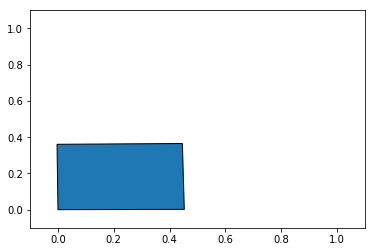

In [19]:
plot_rectangle(rect)